# Project PDA - Drug Consumption

Hello!

Here is the notebook for the project or Python for Data Analysis.
For this project we have to analyse, visualize and create a model aroud a given dataset.
The dataset we will be working with is "Drug Consumption" from 2016 with 1885 respondants and 12 attributes.

You can find our dataset here: https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified

## Imports

We import the libraries we will need for the rest of this notebook :

* Pandas to help us manipulate datasets
* Matplolib to help us creating plots to visualize the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We start by importing all the scikit-learn library and all the models we will need for creating ou own machine learning algorithm models.

In [2]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, Binarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

## Load the Dataset and rearranging the data

For this part we are going to pre-process the dataset by encoding, normalizing, and impute all of it.

### Load the Dataset

The first step is to read the dataset into a dataframe thanks to Pandas library. We are reaching it with a direct link to Racel's Github account.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/raacee/project_pda/main/drug_consumption.csv", header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


We can have a first look at the loaded dataframe. We can observe the lack of columns names. We add them manually and set an index name 'ID'.

In [4]:
# Provide the accurate column names in a list
columns = [
    "ID",
    "Age",
    "Gender",
    "Education",
    "Country",
    "Ethnicity",
    "Nscore",
    "Escore",
    "Oscore",
    "Ascore",
    "Cscore",
    "Impulsive",
    "SS",
    "Alcohol",
    "Amphet",
    "Amyl",
    "Benzos",
    "Caff",
    "Cannabis",
    "Choc",
    "Coke",
    "Crack",
    "Ecstasy",
    "Heroin",
    "Ketamine",
    "Legalh",
    "LSD",
    "Meth",
    "Mushrooms",
    "Nicotine",
    "Semer",
    "VSA"
]

# Assign them to the df
df.columns = columns

# Set the index to the ID
df.set_index('ID', inplace=True)

# Display the df with the new columns and index
df.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Remove Overclaimers

Semer (Semeron) is interesting because it's a fake drug used only to check whether people are lying on the poll. So we can determine which people are lying.

In [5]:
# Display the Overclaimers
(df['Semer'] != 'Never Used').value_counts()

True    1885
Name: Semer, dtype: int64

In [6]:
df = df[df['Semer'] != 'Never Used']
df.drop('Semer', axis=1, inplace=True)

No overclaimers so no need to treat this

### Adding Columns

Let's add here some colums and parameters to help us analyze and visualize the data better.

In [7]:
# Create a list of columns with all the drugs in it
drug_names = df.columns[list(df.columns).index('Alcohol'):]
drug_names

Index(['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'VSA'],
      dtype='object')

In [8]:
def has_used_at_least_once(element):
  '''
  Determines if a person has used a drug at least once.
  Returns:
  - bool: True if the person has used the drug at least once, False otherwise.
  '''
  possible_values = ['Never Used', 'CL0']
  return (element not in possible_values)

In [9]:
df[drug_names].applymap(has_used_at_least_once)

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,
1,True,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False
2,True,True,True,False,True,True,True,True,False,True,False,True,False,True,True,False,True,False
3,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,False,False
4,True,False,False,True,True,True,True,True,False,False,False,True,False,False,False,False,True,False
5,True,True,True,False,True,True,True,False,False,True,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,True,False,False,False,True,True,True,False,False,False,False,False,True,True,False,False,False,True
1885,True,False,False,False,True,True,True,False,False,True,False,False,True,True,True,True,True,False
1886,True,True,True,True,True,True,True,True,False,True,False,True,False,True,False,True,True,False


#### Adding Drugs Tested & Tested More Than Once column

In [10]:
# Create a column with the number of drugs tested for each person
df['Drugs Tested'] = df[drug_names].applymap(has_used_at_least_once).sum(axis=1)
df['Drugs Tested']

ID
1        6
2       12
3        5
4        8
5       10
        ..
1884     7
1885    10
1886    13
1887     9
1888    13
Name: Drugs Tested, Length: 1885, dtype: int64

In [11]:
# Calculate the mean number of drugs used
mean_num_drugs_used = df['Drugs Tested'].mean()

print(f"The mean number of drugs used in the dataset is: {mean_num_drugs_used:.2f}")

The mean number of drugs used in the dataset is: 8.97


In [12]:
# Create a column for the "Tested More Than Once" people
df['TMTO'] = (df['Drugs Tested'] >= 1).astype(int)
df['TMTO'].value_counts()

1    1884
0       1
Name: TMTO, dtype: int64

So about everyone in this dataset has tested at least one drug

In [13]:
# Display the person who hasn't used drugs
df[df['TMTO'] == 0]

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Drugs Tested,TMTO
ID,,,,,,,,,,,,,,,,,,,,,
1281,-0.95197,-0.48246,0.45468,0.96082,-0.50212,0.82562,0.63779,-0.84732,-2.21844,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,0,0


This means that this dataset doesn't contain data about people who never used drugs. So we cannot predict if someone will have a tendency to use drug according to his/her personnality score, only the amount of drugs and the frequency of people already using drugs. So we might as well delete this entry.

#### Adding legal and illegal drugs columns

We can also add columns about the number of legal and illegal drugs each of these persons took

In [14]:
legal = ['Alcohol','Choc','Caff', 'Nicotine']
illegal = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms']

In [15]:
df['Legal Drugs'] = df[legal].applymap(has_used_at_least_once).sum(axis=1)
df['Illegal Drugs'] = df[illegal].applymap(has_used_at_least_once).sum(axis=1)

### Changing the data for drugs

In [16]:
df[drug_names]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1885,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1886,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0


Theses values aren't real values. Let's change them.

In [17]:
drugs_categories = ['CL'+str(i) for i in range(0,7)]
drugs_categories = [ drugs_categories ] * len(drug_names)
drugs_categories

[['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'],
 ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']]

In [18]:
ord_enc = OrdinalEncoder()
ord_enc.fit(df[drug_names])

OrdinalEncoder()

In [19]:
df[drug_names] = ord_enc.transform(df[drug_names])

In [20]:
df[drug_names]

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
ID,,,,,,,,,,,,,,,,,,
1,5.0,2.0,0.0,2.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,5.0,2.0,2.0,0.0,6.0,4.0,6.0,3.0,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
3,6.0,0.0,0.0,0.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,0.0,0.0,3.0,5.0,2.0,4.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
5,4.0,1.0,1.0,0.0,6.0,3.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,5.0,0.0,0.0,0.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,5.0
1885,5.0,0.0,0.0,0.0,5.0,3.0,4.0,0.0,0.0,2.0,0.0,0.0,3.0,5.0,4.0,4.0,5.0,0.0
1886,4.0,6.0,5.0,5.0,6.0,6.0,6.0,4.0,0.0,4.0,0.0,2.0,0.0,2.0,0.0,2.0,6.0,0.0


That's way better.

## Data visualisation and analysis

### Setup for data visualisation

In [21]:
# Creating a copy of the df to make data visualisation
df_vis = df.copy()

In [22]:
df_vis['TMTO'].value_counts()

1    1884
0       1
Name: TMTO, dtype: int64

We know that every person in this dataset has used at least a drug so that column is useless.

In [23]:
df_vis.drop('TMTO', inplace = True, axis = 1)
df_vis.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA', 'Drugs Tested', 'Legal Drugs', 'Illegal Drugs'],
      dtype='object')

We could split the data into "soft" and "hard" or "legal" and "illegal" psychoactive drugs

### Remaping the values in the original df  
The dataframe contains numbers these numbers represent categories. For example 0.49788 in Age means that person is between 18-24 years old. So we remap them for in the original df to strings.


#### Age

We first change the age category for it to be clearer

In [24]:
# Define a mapping dictionary for Age values
age_mapping = {
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+'
}

# Replace the numeric values in the "Age" column with their meanings
df_vis['Age'] = df_vis['Age'].replace(age_mapping)

# Display the Age column
df_vis['Age'].head(5)

ID
1    35-44
2    25-34
3    35-44
4    18-24
5    35-44
Name: Age, dtype: object

In [25]:
# Calculate the fractions and cases for each unique age category
age_counts = df_vis['Age'].value_counts()
total_cases = len(df_vis)
age_fractions = (age_counts / total_cases) * 100

# Create a DataFrame to display the results
age_info_df = pd.DataFrame({'Age Category': age_counts.index, 'Cases': age_counts.values, 'Fraction (%)': age_fractions.values})

# Display the Dataframe
age_info_df

,Age Category,Cases,Fraction (%)
0,18-24,643,34.111406
1,25-34,481,25.517241
2,35-44,356,18.885942
3,45-54,294,15.596817
4,55-64,93,4.933687
5,65+,18,0.954907


We can already observe that the biggest category represented is the 18-24 years old category

The Cases and the Fractions are accurate, let's continue

#### Gender

We do the same for the Gender attribute

In [26]:
# Define a mapping dictionary for Gender values
gender_mapping = {
    0.48246: 'Female',
    -0.48246: 'Male'
}

# Replace the numeric values in the "Gender" column with their meanings
df_vis['Gender'] = df_vis['Gender'].replace(gender_mapping)

# Display the Gender Column
df_vis['Gender'].head(5)

ID
1    Female
2      Male
3      Male
4    Female
5    Female
Name: Gender, dtype: object

In [27]:
# Calculate the fractions and cases for each unique gender category
gender_counts = df_vis['Gender'].value_counts()
total_cases = len(df_vis)
gender_fractions = (gender_counts / total_cases) * 100

# Create a DataFrame to display the results
gender_info_df = pd.DataFrame({'Gender': gender_counts.index, 'Cases': gender_counts.values, 'Fraction (%)': gender_fractions.values})

# Display the DataFrame
gender_info_df

,Gender,Cases,Fraction (%)
0,Male,943,50.026525
1,Female,942,49.973475


#### Education

In [28]:
# Define a mapping dictionary for Education values
education_mapping = {
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university, no certificate or degree',
    -0.05921: 'Professional certificate/diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree'
}

# Replace the numeric values in the "Education" column with their meanings
df_vis['Education'] = df_vis['Education'].replace(education_mapping)

# Display the Education column
df_vis['Education'].head(5)

ID
1    Professional certificate/diploma
2                    Doctorate degree
3    Professional certificate/diploma
4                      Masters degree
5                    Doctorate degree
Name: Education, dtype: object

In [29]:
# Calculate the fractions and cases for each unique education category
education_counts = df_vis['Education'].value_counts()
total_cases = len(df_vis)
education_fractions = (education_counts / total_cases) * 100

# Create a DataFrame to display the results
education_info_df = pd.DataFrame({'Education Level': education_counts.index, 'Cases': education_counts.values, 'Fraction (%)': education_fractions.values})

# Display the DataFrame
education_info_df

,Education Level,Cases,Fraction (%)
0,"Some college or university, no certificate or ...",506,26.843501
1,University degree,480,25.464191
2,Masters degree,283,15.013263
3,Professional certificate/diploma,270,14.323607
4,Left school at 18 years,100,5.305040
5,Left school at 16 years,99,5.251989
6,Doctorate degree,89,4.721485
7,Left school at 17 years,30,1.591512
8,Left school before 16 years,28,1.485411


We can already observe that the most represented category is "University, college degrees" and the least one is "left scool before 16"

#### Country

In [30]:
# Define a mapping dictionary for Country values
country_mapping = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}

# Replace the numeric values in the "Country" column with their meanings
df_vis['Country'] = df_vis['Country'].replace(country_mapping)

# Display the Country column
df_vis['Country'].head(5)

ID
1    UK
2    UK
3    UK
4    UK
5    UK
Name: Country, dtype: object

In [31]:
# Calculate the fractions and cases for each unique country category
country_counts = df_vis['Country'].value_counts()
total_cases = len(df_vis)
country_fractions = (country_counts / total_cases) * 100

# Create a DataFrame to display the results
country_info_df = pd.DataFrame({'Country': country_counts.index, 'Cases': country_counts.values, 'Fraction (%)': country_fractions.values})

# Display the DataFrame
country_info_df

,Country,Cases,Fraction (%)
0,UK,1044,55.384615
1,USA,557,29.549072
2,Other,118,6.259947
3,Canada,87,4.615385
4,Australia,54,2.864721
5,Republic of Ireland,20,1.061008
6,New Zealand,5,0.265252


This survey took place mostly in the UK and US

#### Ethnicity

In [32]:
# Define a mapping dictionary for Ethnicity values
ethnicity_mapping = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

# Replace the numeric values in the "Ethnicity" column with their meanings
df_vis['Ethnicity'] = df_vis['Ethnicity'].replace(ethnicity_mapping)

# Display the Ethnicity Column
df_vis['Ethnicity'].head(5)

ID
1    Mixed-White/Asian
2                White
3                White
4                White
5                White
Name: Ethnicity, dtype: object

In [33]:
# Calculate the fractions and cases for each unique ethnicity category
ethnicity_counts = df_vis['Ethnicity'].value_counts()
total_cases = len(df_vis)
ethnicity_fractions = (ethnicity_counts / total_cases) * 100

# Create a DataFrame to display the results
ethnicity_info_df = pd.DataFrame({'Ethnicity': ethnicity_counts.index, 'Cases': ethnicity_counts.values, 'Fraction (%)': ethnicity_fractions.values})

# Display the DataFrame
ethnicity_info_df

,Ethnicity,Cases,Fraction (%)
0,White,1720,91.246684
1,Other,63,3.342175
2,Black,33,1.750663
3,Asian,26,1.379310
4,Mixed-White/Asian,20,1.061008
5,Mixed-White/Black,20,1.061008
6,Mixed-Black/Asian,3,0.159151


#### Nscore

The Nscore references to NEO-FFI-R Neuroticism test that helps showing one's specific personality traits such as anxiety, angry hostily, depression, self-conciousness, impulsiveness and vulnerability. The more the score is high, the more those traits are important in the individual tested.

In [34]:
# Define a mapping dictionary for Nscore values
nscore_mapping = {
    -3.46436: '12',
    -3.15735: '13',
    -2.75696: '14',
    -2.52197: '15',
    -2.42317: '16',
    -2.34360: '17',
    -2.21844: '18',
    -2.05048: '19',
    -1.86962: '20',
    -1.69163: '21',
    -1.55078: '22',
    -1.43907: '23',
    -1.32828: '24',
    -1.19430: '25',
    -1.05308: '26',
    -0.92104: '27',
    -0.79151: '28',
    -0.67825: '29',
    -0.58016: '30',
    -0.46725: '31',
    -0.34799: '32',
    -0.24649: '33',
    -0.14882: '34',
    -0.05188: '35',
    0.04257: '36',
    0.13606: '37',
    0.22393: '38',
    0.31287: '39',
    0.41667: '40',
    0.52135: '41',
    0.62967: '42',
    0.73545: '43',
    0.82562: '44',
    0.91093: '45',
    1.02119: '46',
    1.13281: '47',
    1.23461: '48',
    1.37297: '49',
    1.49158: '50',
    1.60383: '51',
    1.72012: '52',
    1.83990: '53',
    1.98437: '54',
    2.12700: '55',
    2.28554: '56',
    2.46262: '57',
    2.61139: '58',
    2.82196: '59',
    3.27393: '60'
}

# Replace the numeric values in the "Nscore" column with their meanings
df_vis['Nscore'] = df_vis['Nscore'].replace(nscore_mapping)

# Display the Nscore column
df_vis['Nscore'].head(5)

ID
1    39
2    29
3    31
4    34
5    43
Name: Nscore, dtype: object

In [35]:
# Calculate the fractions and cases for each unique Nscore category
nscore_counts = df_vis['Nscore'].value_counts()
total_cases = len(df_vis)
nscore_fractions = (nscore_counts / total_cases) * 100

# Create a DataFrame to display the results
nscore_info_df = pd.DataFrame({'Nscore Value': nscore_counts.index, 'Cases': nscore_counts.values, 'Fraction (%)': nscore_fractions.values})

# Display the DataFrame
nscore_info_df.head(10)

,Nscore Value,Cases,Fraction (%)
0,31,87,4.615385
1,40,80,4.244032
2,32,78,4.137931
3,42,77,4.084881
4,34,76,4.031830
5,36,73,3.872679
6,28,70,3.713528
7,35,69,3.660477
8,33,68,3.607427
9,37,67,3.554377


#### Escore

 Escore (Real) is NEO-FFI-R Extraversion.

In [36]:
# Define a mapping dictionary for Escore values
escore_mapping = {
    -3.27393: '16',
    -3.00537: '18',
    -2.72827: '19',
    -2.53830: '20',
    -2.44904: '21',
    -2.32338: '22',
    -2.21069: '23',
    -2.11437: '24',
    -2.03972: '25',
    -1.92173: '26',
    -1.76250: '27',
    -1.63340: '28',
    -1.50796: '29',
    -1.37639: '30',
    -1.23177: '31',
    -1.09207: '32',
    -0.94779: '33',
    -0.80615: '34',
    -0.69509: '35',
    -0.57545: '36',
    -0.43999: '37',
    -0.30033: '38',
    -0.15487: '39',
    0.00332: '40',
    0.16767: '41',
    0.32197: '42',
    0.47617: '43',
    0.63779: '44',
    0.80523: '45',
    0.96248: '46',
    1.11406: '47',
    1.28610: '48',
    1.45421: '49',
    1.58487: '50',
    1.74091: '51',
    1.93886: '52',
    2.12700: '53',
    2.32338: '54',
    2.57309: '55',
    2.85950: '56',
    3.00537: '58',
    3.27393: '59'
}

# Replace the numeric values in the "Escore" column with their meanings
df_vis['Escore'] = df_vis['Escore'].replace(escore_mapping)

# Display the Escore column
df_vis['Escore'].head(5)

ID
1    36
2    52
3    45
4    34
5    28
Name: Escore, dtype: object

In [37]:
# Calculate the fractions and cases for each unique Escore category
escore_counts = df_vis['Escore'].value_counts()
total_cases = len(df_vis)
escore_fractions = (escore_counts / total_cases) * 100

# Create a DataFrame to display the results
escore_info_df = pd.DataFrame({'Escore Value': escore_counts.index, 'Cases': escore_counts.values, 'Fraction (%)': escore_fractions.values})

# Display the DataFrame
escore_info_df.head(5)

,Escore Value,Cases,Fraction (%)
0,40,130,6.896552
1,41,116,6.153846
2,42,109,5.782493
3,39,107,5.676393
4,38,106,5.623342


#### Oscore

Oscore also refers to the NEO-FFI-R test but is about the Openness to experience personality trait.

In [38]:
# Define a mapping dictionary for Oscore values
oscore_mapping = {
    -3.27393: '24',
    -2.85950: '26',
    -2.63199: '28',
    -2.39883: '29',
    -2.21069: '30',
    -2.09015: '31',
    -1.97495: '32',
    -1.82919: '33',
    -1.68062: '34',
    -1.55521: '35',
    -1.42424: '36',
    -1.27553: '37',
    -1.11902: '38',
    -0.97631: '39',
    -0.84732: '40',
    -0.71727: '41',
    -0.58331: '42',
    -0.45174: '43',
    -0.31776: '44',
    -0.17779: '45',
    -0.01928: '46',
    0.14143: '47',
    0.29338: '48',
    0.44585: '49',
    0.58331: '50',
    0.72330: '51',
    0.88309: '52',
    1.06238: '53',
    1.24033: '54',
    1.43533: '55',
    1.65653: '56',
    1.88511: '57',
    2.15324: '58',
    2.44904: '59',
    2.90161: '60'
}

# Replace the numeric values in the "Oscore" column with their meanings
df_vis['Oscore'] = df_vis['Oscore'].replace(oscore_mapping)

# Display the Oscore column
df_vis['Oscore'].head(5)

ID
1    42
2    55
3    40
4    46
5    43
Name: Oscore, dtype: object

In [39]:
# Calculate the fractions and cases for each unique Oscore category
oscore_counts = df_vis['Oscore'].value_counts()
total_cases = len(df_vis)
oscore_fractions = (oscore_counts / total_cases) * 100

# Create a DataFrame to display the results
oscore_info_df = pd.DataFrame({'Oscore Value': oscore_counts.index, 'Cases': oscore_counts.values, 'Fraction (%)': oscore_fractions.values})

# Display the DataFrame
oscore_info_df.head(5)

,Oscore Value,Cases,Fraction (%)
0,46,134,7.108753
1,48,116,6.153846
2,47,107,5.676393
3,45,103,5.464191
4,44,101,5.358090


#### Ascore

A score corresponds to the Agreeableness personality trait.

In [40]:
# Define a mapping dictionary for Ascore values
ascore_mapping = {
    -3.46436: '12',
    -3.15735: '16',
    -3.00537: '18',
    -2.90161: '23',
    -2.78793: '24',
    -2.70172: '25',
    -2.53830: '26',
    -2.35413: '27',
    -2.21844: '28',
    -2.07848: '29',
    -1.92595: '30',
    -1.77200: '31',
    -1.62090: '32',
    -1.47955: '33',
    -1.34289: '34',
    -1.21213: '35',
    -1.07533: '36',
    -0.91699: '37',
    -0.76096: '38',
    -0.60633: '39',
    -0.45321: '40',
    -0.30172: '41',
    -0.15487: '42',
    -0.01729: '43',
    0.13136: '44',
    0.28783: '45',
    0.43852: '46',
    0.59042: '47',
    0.76096: '48',
    0.94156: '49',
    1.11406: '50',
    1.28610: '51',
    1.45039: '52',
    1.61108: '53',
    1.81866: '54',
    2.03972: '55',
    2.23427: '56',
    2.46262: '57',
    2.75696: '58',
    3.15735: '59',
    3.46436: '60'
}

# Replace the numeric values in the "Ascore" column with their meanings
df_vis['Ascore'] = df_vis['Ascore'].replace(ascore_mapping)

# Display the Ascore column
df_vis['Ascore'].head(5)

ID
1    37
2    48
3    32
4    47
5    41
Name: Ascore, dtype: object

In [41]:
# Calculate the fractions and cases for each unique Ascore category
ascore_counts = df_vis['Ascore'].value_counts()
total_cases = len(df_vis)
ascore_fractions = (ascore_counts / total_cases) * 100

# Create a DataFrame to display the results
ascore_info_df = pd.DataFrame({'Ascore Value': ascore_counts.index, 'Cases': ascore_counts.values, 'Fraction (%)': ascore_fractions.values})

# Display the DataFrame
ascore_info_df.head(5)

,Ascore Value,Cases,Fraction (%)
0,44,118,6.259947
1,41,114,6.047745
2,45,112,5.941645
3,43,105,5.570292
4,48,104,5.517241


#### Cscore

Cscore coresponds to Conscientiousness personality trait.

In [42]:
# Define a mapping dictionary for Cscore values
cscore_mapping = {
    -3.46436: '17',
    -3.15735: '19',
    -2.90161: '20',
    -2.72827: '21',
    -2.57309: '22',
    -2.42317: '23',
    -2.30408: '24',
    -2.18109: '25',
    -2.04506: '26',
    -1.92173: '27',
    -1.78169: '28',
    -1.64101: '29',
    -1.51840: '30',
    -1.38502: '31',
    -1.25773: '32',
    -1.13788: '33',
    -1.01450: '34',
    -0.89891: '35',
    -0.78155: '36',
    -0.65253: '37',
    -0.52745: '38',
    -0.40581: '39',
    -0.27607: '40',
    -0.14277: '41',
    -0.00665: '42',
    0.12331: '43',
    0.25953: '44',
    0.41594: '45',
    0.58489: '46',
    0.75830: '47',
    0.93949: '48',
    1.13407: '49',
    1.30612: '50',
    1.46191: '51',
    1.63088: '52',
    1.81175: '53',
    2.04506: '54',
    2.33337: '55',
    2.63199: '56',
    3.00537: '57',
    3.46436: '59'
}

# Replace the numeric values in the "Cscore" column with their meanings
df_vis['Cscore'] = df_vis['Cscore'].replace(cscore_mapping)

# Display the Cscore column
df_vis['Cscore'].head(5)

ID
1    42
2    41
3    34
4    46
5    50
Name: Cscore, dtype: object

In [43]:
# Calculate the fractions and cases for each unique Cscore category
cscore_counts = df_vis['Cscore'].value_counts()
total_cases = len(df_vis)
cscore_fractions = (cscore_counts / total_cases) * 100

# Create a DataFrame to display the results
cscore_info_df = pd.DataFrame({'Cscore Value': cscore_counts.index, 'Cases': cscore_counts.values, 'Fraction (%)': cscore_fractions.values})

# Display the DataFrame
cscore_info_df.head(5)

,Cscore Value,Cases,Fraction (%)
0,46,113,5.994695
1,44,111,5.888594
2,45,111,5.888594
3,42,105,5.570292
4,41,99,5.251989


#### Impulsive

In [44]:
# Define a mapping dictionary for Impulsive values
impulsive_mapping = {
    -2.55524: 'Very Low',
    -1.37983: 'Low',
    -0.71126: 'Moderate',
    -0.21712: 'Slightly Low',
    0.19268: 'Slightly High',
    0.52975: 'High',
    0.88113: 'Very High',
    1.29221: 'Extremely High',
    1.86203: 'Much Higher',
    2.90161: 'Most High',
}

# Replace the numeric values in the "Impulsive" column with their meanings
df_vis['Impulsive'] = df_vis['Impulsive'].replace(impulsive_mapping)

# Display the Impulsive column
df_vis['Impulsive'].head(5)

ID
1    Slightly Low
2        Moderate
3             Low
4             Low
5    Slightly Low
Name: Impulsive, dtype: object

In [45]:
# Calculate the fractions and cases for each unique Impulsive category
impulsive_counts = df_vis['Impulsive'].value_counts()
total_cases = len(df_vis)
impulsive_fractions = (impulsive_counts / total_cases) * 100

# Create a DataFrame to display the results
impulsive_info_df = pd.DataFrame({'Impulsive Value': impulsive_counts.index, 'Cases': impulsive_counts.values, 'Fraction (%)': impulsive_fractions.values})

# Display the DataFrame
impulsive_info_df

,Impulsive Value,Cases,Fraction (%)
0,Slightly Low,355,18.832891
1,Moderate,307,16.286472
2,Low,276,14.641910
3,Slightly High,257,13.633952
4,High,216,11.458886
5,Very High,195,10.344828
6,Extremely High,148,7.851459
7,Much Higher,104,5.517241
8,Very Low,20,1.061008
9,Most High,7,0.371353


#### SS

SS reprensents the "sensation seeing" attribute, we can see by categories, how much the individual felt after the consumption of the drug.

In [46]:
# Define a mapping dictionary for SS values
ss_mapping = {
    -2.07848: 'Very Low',
    -1.54858: 'Low',
    -1.18084: 'Moderate Low',
    -0.84637: 'Moderate',
    -0.52593: 'Moderate High',
    -0.21575: 'High',
    0.07987: 'Very High',
    0.40148: 'Much Higher',
    0.76540: 'Most High',
    1.22470: 'Almost Highest',
    1.92173: 'Highest',
}

# Replace the numeric values in the "SS" column with their meanings
df_vis['SS'] = df_vis['SS'].replace(ss_mapping)

# Display the SS column
df_vis['SS'].head(5)

ID
1    Moderate Low
2            High
3     Much Higher
4    Moderate Low
5            High
Name: SS, dtype: object

In [47]:
# Calculate the fractions and cases for each unique SS category
ss_counts = df_vis['SS'].value_counts()
total_cases = len(df_vis)
ss_fractions = (ss_counts / total_cases) * 100

# Create a DataFrame to display the results
ss_info_df = pd.DataFrame({'SS Value': ss_counts.index, 'Cases': ss_counts.values, 'Fraction (%)': ss_fractions.values})

# Display the DataFrame
ss_info_df

,SS Value,Cases,Fraction (%)
0,Much Higher,249,13.209549
1,High,223,11.830239
2,Very High,219,11.618037
3,Moderate High,211,11.193634
4,Most High,211,11.193634
5,Almost Highest,210,11.140584
6,Moderate,169,8.965517
7,Moderate Low,132,7.002653
8,Highest,103,5.464191
9,Low,87,4.615385


Now we are going to see the mapping of the different drugs from never used to used in last day.

#### Alcohol

Alcohol is class of alcohol consumption. It is output attribute with following distribution of classes.


In [48]:
# Define mapping dictionary for all the CL classes
CL_mapping = {
    '0.0': 'Never Used',
    '1.0': 'Used over a Decade Ago',
    '2.0': 'Used in Last Decade',
    '3.0': 'Used in Last Year',
    '4.0': 'Used in Last Month',
    '5.0': 'Used in Last Week',
    '6.0': 'Used in Last Day',
}

# Replace the numeric values in the "Alcohol" column with their meanings
df_vis['Alcohol'] = df_vis['Alcohol'].replace(CL_mapping)

# Display the Alcohol column
df_vis['Alcohol'].head(5)

ID
1    5.0
2    5.0
3    6.0
4    4.0
5    4.0
Name: Alcohol, dtype: float64

In [49]:
# Calculate the fractions and cases for each unique class in "Alcohol"
alcohol_counts = df_vis['Alcohol'].value_counts()
total_cases = len(df_vis)
alcohol_fractions = (alcohol_counts / total_cases) * 100

# Create a DataFrame to display the results for "Alcohol"
alcohol_info_df = pd.DataFrame({'Alcohol Class': alcohol_counts.index, 'Alcohol Cases': alcohol_counts.values, 'Alcohol Fraction (%)': alcohol_fractions.values})

# Display the DataFrame for "Alcohol"
alcohol_info_df

,Alcohol Class,Alcohol Cases,Alcohol Fraction (%)
0,5.0,759,40.265252
1,6.0,505,26.790451
2,4.0,287,15.225464
3,3.0,198,10.503979
4,2.0,68,3.607427
5,1.0,34,1.803714
6,0.0,34,1.803714


#### Amphet

Amphet is class of amphetamines consumption. It is output attribute with following distribution of classes. Amphet can be prescribed for medical purposes, such as treating attention deficit hyperactivity disorder (ADHD).

In [50]:
# Replace the numeric values in the "Amphet" column with their meanings
df_vis['Amphet'] = df_vis['Amphet'].replace(CL_mapping)

# Display the Amphet column
df_vis['Amphet'].head(5)

ID
1    2.0
2    2.0
3    0.0
4    0.0
5    1.0
Name: Amphet, dtype: float64

In [51]:
# Calculate the fractions and cases for each unique class in "Amphet"
amphet_counts = df_vis['Amphet'].value_counts()
total_cases = len(df_vis)
amphet_fractions = (amphet_counts / total_cases) * 100

# Create a DataFrame to display the results for "Amphet"
amphet_info_df = pd.DataFrame({'Amphet Class': amphet_counts.index, 'Amphet Cases': amphet_counts.values, 'Amphet Fraction (%)': amphet_fractions.values})

# Display the DataFrame for "Amphet"
amphet_info_df

,Amphet Class,Amphet Cases,Amphet Fraction (%)
0,0.0,976,51.777188
1,2.0,243,12.891247
2,1.0,230,12.201592
3,3.0,198,10.503979
4,6.0,102,5.411141
5,4.0,75,3.978780
6,5.0,61,3.236074


C'est intéressant de voir qu'il y a beaucoup de personne qui ont pris des amphets il y a plus de 10 ans, peut être des gens adultes qui en prennaient quand ils étaient jeunes, paralèlle à faire avec l'age c'est SUR


#### Amyl

Amyl is class of amyl nitrite consumption. It is output attribute with following distribution of classes. One example of Amyl is poppers.

In [52]:
# Replace the numeric values in the "Amyl" column with their meanings
df_vis['Amyl'] = df_vis['Amyl'].replace(CL_mapping)

# Display the Amyl column
df_vis['Amyl'].head(5)

ID
1    0.0
2    2.0
3    0.0
4    0.0
5    1.0
Name: Amyl, dtype: float64

In [53]:
# Calculate the fractions and cases for each unique class in "Amyl"
amyl_counts = df_vis['Amyl'].value_counts()
total_cases = len(df_vis)
amyl_fractions = (amyl_counts / total_cases) * 100

# Create a DataFrame to display the results for "Amyl"
amyl_info_df = pd.DataFrame({'Amyl Class': amyl_counts.index, 'Amyl Cases': amyl_counts.values, 'Amyl Fraction (%)': amyl_fractions.values})

# Display the DataFrame for "Amyl"
amyl_info_df

,Amyl Class,Amyl Cases,Amyl Fraction (%)
0,0.0,1305,69.230769
1,2.0,237,12.572944
2,1.0,210,11.140584
3,3.0,92,4.880637
4,4.0,24,1.273210
5,5.0,14,0.742706
6,6.0,3,0.159151


#### Benzos

Benzos is class of benzodiazepine consumption. It is output attribute with following distribution of classes:

In [54]:
# Replace the numeric values in the "Benzos" column with their meanings
df_vis['Benzos'] = df_vis['Benzos'].replace(CL_mapping)

# Display the Benzos column
df_vis['Benzos'].head(5)

ID
1    2.0
2    0.0
3    0.0
4    3.0
5    0.0
Name: Benzos, dtype: float64

In [55]:
# Calculate the fractions and cases for each unique class in "Benzos"
benzos_counts = df_vis['Benzos'].value_counts()
total_cases = len(df_vis)
benzos_fractions = (benzos_counts / total_cases) * 100

# Create a DataFrame to display the results for "Benzos"
benzos_info_df = pd.DataFrame({'Benzos Class': benzos_counts.index, 'Benzos Cases': benzos_counts.values, 'Benzos Fraction (%)': benzos_fractions.values})

# Display the DataFrame for "Benzos"
benzos_info_df

,Benzos Class,Benzos Cases,Benzos Fraction (%)
0,0.0,1000,53.050398
1,3.0,236,12.519894
2,2.0,234,12.413793
3,4.0,120,6.366048
4,1.0,116,6.153846
5,6.0,95,5.039788
6,5.0,84,4.456233


#### Caff, Cannabis, Choc and Coke

Here are grouped what we consider "soft" drugs :

* Caff is Caffeine
* Cannabis is cannabis (obviously)
* Choc is Chocolate
* Coke is cocaine





In [56]:
# Replace the numeric values in the columns with their meanings
df_vis['Caff'] = df_vis['Caff'].replace(CL_mapping)
df_vis['Cannabis'] = df_vis['Cannabis'].replace(CL_mapping)
df_vis['Choc'] = df_vis['Choc'].replace(CL_mapping)
df_vis['Coke'] = df_vis['Coke'].replace(CL_mapping)

# Calculate the fractions and cases for each unique class in each column
caff_counts = df_vis['Caff'].value_counts()
cannabis_counts = df_vis['Cannabis'].value_counts()
choc_counts = df_vis['Choc'].value_counts()
coke_counts = df_vis['Coke'].value_counts()

total_cases = len(df)

caff_fractions = (caff_counts / total_cases) * 100
cannabis_fractions = (cannabis_counts / total_cases) * 100
choc_fractions = (choc_counts / total_cases) * 100
coke_fractions = (coke_counts / total_cases) * 100

# Create DataFrames to display the results for each column
caff_info_df = pd.DataFrame({'Caff Class': caff_counts.index, 'Caff Cases': caff_counts.values, 'Caff Fraction (%)': caff_fractions.values})
cannabis_info_df = pd.DataFrame({'Cannabis Class': cannabis_counts.index, 'Cannabis Cases': cannabis_counts.values, 'Cannabis Fraction (%)': cannabis_fractions.values})
choc_info_df = pd.DataFrame({'Choc Class': choc_counts.index, 'Choc Cases': choc_counts.values, 'Choc Fraction (%)': choc_fractions.values})
coke_info_df = pd.DataFrame({'Coke Class': coke_counts.index, 'Coke Cases': coke_counts.values, 'Coke Fraction (%)': coke_fractions.values})

# Display the DataFrames for each column
print("Caff:")
print(caff_info_df)

print("\nCannabis:")
print(cannabis_info_df)

print("\nChoc:")
print(choc_info_df)

print("\nCoke:")
print(coke_info_df)

Caff:
   Caff Class  Caff Cases  Caff Fraction (%)
0         6.0        1385          73.474801
1         5.0         273          14.482759
2         4.0         106           5.623342
3         3.0          60           3.183024
4         0.0          27           1.432361
5         2.0          24           1.273210
6         1.0          10           0.530504

Cannabis:
   Cannabis Class  Cannabis Cases  Cannabis Fraction (%)
0             6.0             463              24.562334
1             0.0             413              21.909814
2             2.0             266              14.111406
3             3.0             211              11.193634
4             1.0             207              10.981432
5             5.0             185               9.814324
6             4.0             140               7.427056

Choc:
   Choc Class  Choc Cases  Choc Fraction (%)
0         6.0         807          42.811671
1         5.0         683          36.233422
2         4.0         296

#### Crack, Ecstasy, Heroin and Ketamine

Here are grouped what we considered "hard" drugs:



In [57]:
# Replace the numeric values in the columns with their meanings
df_vis['Crack'] = df_vis['Crack'].replace(CL_mapping)
df_vis['Ecstasy'] = df_vis['Ecstasy'].replace(CL_mapping)
df_vis['Heroin'] = df_vis['Heroin'].replace(CL_mapping)
df_vis['Ketamine'] = df_vis['Ketamine'].replace(CL_mapping)

# Calculate the fractions and cases for each unique class in each column
crack_counts = df_vis['Crack'].value_counts()
ecstasy_counts = df_vis['Ecstasy'].value_counts()
heroin_counts = df_vis['Heroin'].value_counts()
ketamine_counts = df_vis['Ketamine'].value_counts()

total_cases = len(df)

crack_fractions = (crack_counts / total_cases) * 100
ecstasy_fractions = (ecstasy_counts / total_cases) * 100
heroin_fractions = (heroin_counts / total_cases) * 100
ketamine_fractions = (ketamine_counts / total_cases) * 100

# Create DataFrames to display the results for each column
crack_info_df = pd.DataFrame({'Crack Class': crack_counts.index, 'Crack Cases': crack_counts.values, 'Crack Fraction (%)': crack_fractions.values})
ecstasy_info_df = pd.DataFrame({'Ecstasy Class': ecstasy_counts.index, 'Ecstasy Cases': ecstasy_counts.values, 'Ecstasy Fraction (%)': ecstasy_fractions.values})
heroin_info_df = pd.DataFrame({'Heroin Class': heroin_counts.index, 'Heroin Cases': heroin_counts.values, 'Heroin Fraction (%)': heroin_fractions.values})
ketamine_info_df = pd.DataFrame({'Ketamine Class': ketamine_counts.index, 'Ketamine Cases': ketamine_counts.values, 'Ketamine Fraction (%)': ketamine_fractions.values})

# Display the DataFrames for each column
print("Crack:")
print(crack_info_df)

print("\nEcstasy:")
print(ecstasy_info_df)

print("\nHeroin:")
print(heroin_info_df)

print("\nKetamine:")
print(ketamine_info_df)


Crack:
   Crack Class  Crack Cases  Crack Fraction (%)
0          0.0         1627           86.312997
1          2.0          112            5.941645
2          1.0           67            3.554377
3          3.0           59            3.129973
4          5.0            9            0.477454
5          4.0            9            0.477454
6          6.0            2            0.106101

Ecstasy:
   Ecstasy Class  Ecstasy Cases  Ecstasy Fraction (%)
0            0.0           1021             54.164456
1            3.0            277             14.694960
2            2.0            234             12.413793
3            4.0            156              8.275862
4            1.0            113              5.994695
5            5.0             63              3.342175
6            6.0             21              1.114058

Heroin:
   Heroin Class  Heroin Cases  Heroin Fraction (%)
0           0.0          1605            85.145889
1           2.0            94             4.986737
2    

#### Legalh, LSD, Meth and Mushrooms

Legalh is legalize highs that are found in a pharmaceutical context.Here are grouped the hallucinogenic effect drugs

In [58]:
# Replace the numeric values in the columns with their meanings
df_vis['Legalh'] = df_vis['Legalh'].replace(CL_mapping)
df_vis['LSD'] = df_vis['LSD'].replace(CL_mapping)
df_vis['Meth'] = df_vis['Meth'].replace(CL_mapping)
df_vis['Mushrooms'] = df_vis['Mushrooms'].replace(CL_mapping)

# Calculate the fractions and cases for each unique class in each column
legalh_counts = df_vis['Legalh'].value_counts()
lsd_counts = df_vis['LSD'].value_counts()
meth_counts = df_vis['Meth'].value_counts()
mushrooms_counts = df_vis['Mushrooms'].value_counts()

total_cases = len(df_vis)

legalh_fractions = (legalh_counts / total_cases) * 100
lsd_fractions = (lsd_counts / total_cases) * 100
meth_fractions = (meth_counts / total_cases) * 100
mushrooms_fractions = (mushrooms_counts / total_cases) * 100

# Create DataFrames to display the results for each column
legalh_info_df = pd.DataFrame({'Legalh Class': legalh_counts.index, 'Legalh Cases': legalh_counts.values, 'Legalh Fraction (%)': legalh_fractions.values})
lsd_info_df = pd.DataFrame({'LSD Class': lsd_counts.index, 'LSD Cases': lsd_counts.values, 'LSD Fraction (%)': lsd_fractions.values})
meth_info_df = pd.DataFrame({'Meth Class': meth_counts.index, 'Meth Cases': meth_counts.values, 'Meth Fraction (%)': meth_fractions.values})
mushrooms_info_df = pd.DataFrame({'Mushrooms Class': mushrooms_counts.index, 'Mushrooms Cases': mushrooms_counts.values, 'Mushrooms Fraction (%)': mushrooms_fractions.values})

# Display the DataFrames for each column
print("Legalh:")
print(legalh_info_df)

print("\nLSD:")
print(lsd_info_df)

print("\nMeth:")
print(meth_info_df)

print("\nMushrooms:")
print(mushrooms_info_df)

Legalh:
   Legalh Class  Legalh Cases  Legalh Fraction (%)
0           0.0          1094            58.037135
1           3.0           323            17.135279
2           2.0           198            10.503979
3           4.0           110             5.835544
4           6.0            67             3.554377
5           5.0            64             3.395225
6           1.0            29             1.538462

LSD:
   LSD Class  LSD Cases  LSD Fraction (%)
0        0.0       1069         56.710875
1        1.0        259         13.740053
2        3.0        214         11.352785
3        2.0        177          9.389920
4        4.0         97          5.145889
5        5.0         56          2.970822
6        6.0         13          0.689655

Meth:
   Meth Class  Meth Cases  Meth Fraction (%)
0         0.0        1429          75.809019
1         3.0         149           7.904509
2         2.0          97           5.145889
3         6.0          73           3.872679
4         

#### Nicotine, Semer and VSA

VSA are versatile substance abuse such as solvants like glue, gasoline... Semer is class of fictitious drug Semeron consumption.

In [59]:
# Replace the numeric values in the columns with their meanings
df_vis['Nicotine'] = df_vis['Nicotine'].replace(CL_mapping)
df_vis['VSA'] = df_vis['VSA'].replace(CL_mapping)

# Calculate the fractions and cases for each unique class in each column
nicotine_counts = df['Nicotine'].value_counts()
vsa_counts = df['VSA'].value_counts()

total_cases = len(df)

nicotine_fractions = (nicotine_counts / total_cases) * 100
vsa_fractions = (vsa_counts / total_cases) * 100

# Create DataFrames to display the results for each column
nicotine_info_df = pd.DataFrame({'Nicotine Class': nicotine_counts.index, 'Nicotine Cases': nicotine_counts.values, 'Nicotine Fraction (%)': nicotine_fractions.values})
vsa_info_df = pd.DataFrame({'VSA Class': vsa_counts.index, 'VSA Cases': vsa_counts.values, 'VSA Fraction (%)': vsa_fractions.values})

# Display the DataFrames for each column
print("Nicotine:")
print(nicotine_info_df)

print("\nVSA:")
print(vsa_info_df)

Nicotine:
   Nicotine Class  Nicotine Cases  Nicotine Fraction (%)
0             6.0             610              32.360743
1             0.0             428              22.705570
2             2.0             204              10.822281
3             1.0             193              10.238727
4             3.0             185               9.814324
5             5.0             157               8.328912
6             4.0             108               5.729443

VSA:
   VSA Class  VSA Cases  VSA Fraction (%)
0        0.0       1455         77.188329
1        1.0        200         10.610080
2        2.0        135          7.161804
3        3.0         61          3.236074
4        5.0         14          0.742706
5        4.0         13          0.689655
6        6.0          7          0.371353


#### Display the dataframe

After remapping and renaming the attributes, we show our dataframe

In [60]:
df_vis

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Drugs Tested,Legal Drugs,Illegal Drugs
ID,,,,,,,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39,36,42,37,42,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6,4,2
2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,...,2.0,0.0,2.0,3.0,0.0,4.0,0.0,12,4,8
3,35-44,Male,Professional certificate/diploma,UK,White,31,45,40,32,34,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,3,2
4,18-24,Female,Masters degree,UK,White,34,34,46,47,46,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,8,4,4
5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,...,0.0,1.0,0.0,0.0,2.0,2.0,0.0,10,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,Female,"Some college or university, no certificate or ...",USA,White,25,51,57,48,33,...,0.0,3.0,3.0,0.0,0.0,0.0,5.0,7,3,3
1885,18-24,Male,"Some college or university, no certificate or ...",USA,White,33,51,50,48,30,...,0.0,3.0,5.0,4.0,4.0,5.0,0.0,10,4,6
1886,25-34,Female,University degree,USA,White,47,30,37,31,31,...,2.0,0.0,2.0,0.0,2.0,6.0,0.0,13,4,9


Here are our columns:

In [61]:
df_vis.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA', 'Drugs Tested', 'Legal Drugs', 'Illegal Drugs'],
      dtype='object')

#### Consumption by Age

We want to see in a first place simple graphics about the basic parameters: here are diagram fo age.

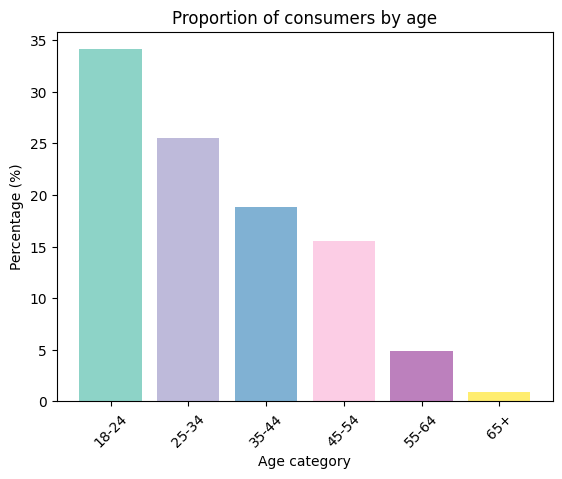

In [62]:
age_categories = age_info_df['Age Category']
fractions = age_info_df['Fraction (%)']

# Defining colors for the bars
colors = plt.cm.Set3(np.linspace(0, 1, len(age_categories)))

# Créer the bar diagram
plt.bar(age_categories, fractions, color=colors)
plt.xlabel('Age category')
plt.ylabel('Percentage (%)')
plt.title('Proportion of consumers by age')

# Getting the legend rotated
plt.xticks(rotation=45)

# Show the final plot
plt.show()

For the age we can see that the biggest Age category represented in this dataset is the 18-24 years old. We notice that the consumer percentage tend to decrease when the age category increase. Which could mean that the older people get the less likely they are to consume drugs.

#### Number of people who have never used drugs

Among the different drugs we want to show the number of people that never consume them. We seperate the legal drugs and illegal ones.

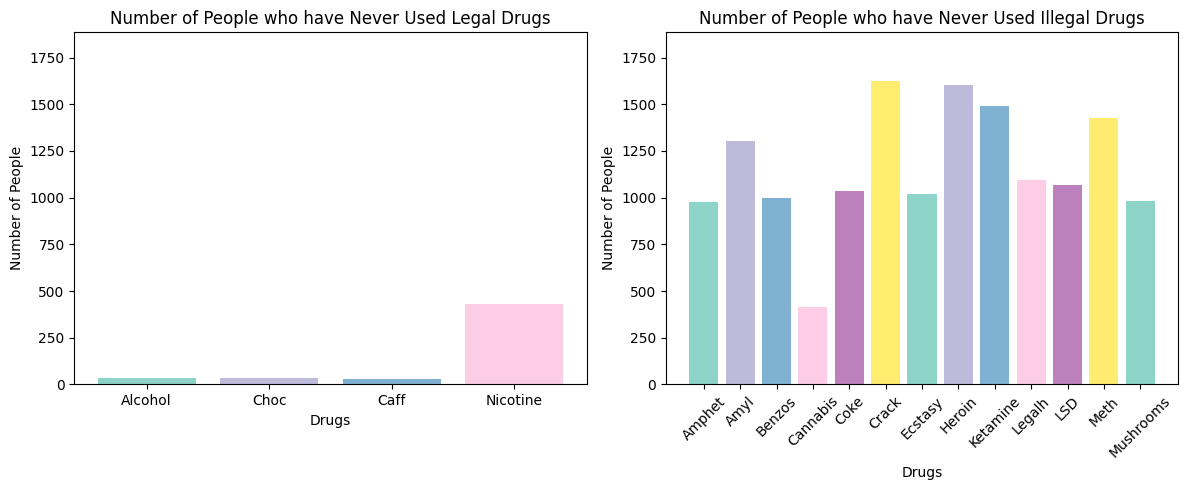

In [63]:
# Count of 'Never Used' for legal drugs
never_used_legal = (df_vis[legal] == 0).sum(axis=0)

# Count of 'Never Used' for illegal drugs
never_used_illegal = (df_vis[illegal] == 0).sum(axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for legal drugs
axes[0].bar(never_used_legal.index, never_used_legal, color=colors)
axes[0].set_title('Number of People who have Never Used Legal Drugs')
axes[0].set_xlabel('Drugs')
axes[0].set_ylabel('Number of People')
axes[0].set_ylim(0, df_vis.shape[0])

# Plot for illegal drugs
axes[1].bar(never_used_illegal.index, never_used_illegal, color=colors)
axes[1].set_title('Number of People who have Never Used Illegal Drugs')
axes[1].set_xlabel('Drugs')
axes[1].set_ylabel('Number of People')
axes[1].set_ylim(0, df_vis.shape[0])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The higher the bar, the lesser someone is likely to have tried that drug.

Nicotine is the only legal drug to be less likely to be consumed.

For the illegal drugs, Crack, Heroin, Ketamine and Meth are the less likely to have been taken by someone

In [64]:
# Display the count of 'Never Used' for legal drugs
never_used_legal

Alcohol      34
Choc         32
Caff         27
Nicotine    428
dtype: int64

We see that legal drugs were used more than illegal ones. We also note that the most widely used legal drug is caffeine (there are only 27 people who have never used caffeine). The most widely used illegal drug is cannabis by far.

#### Link between education level and drug consumption

We are now going to use the education parameter to see a link between education level and drug consumption

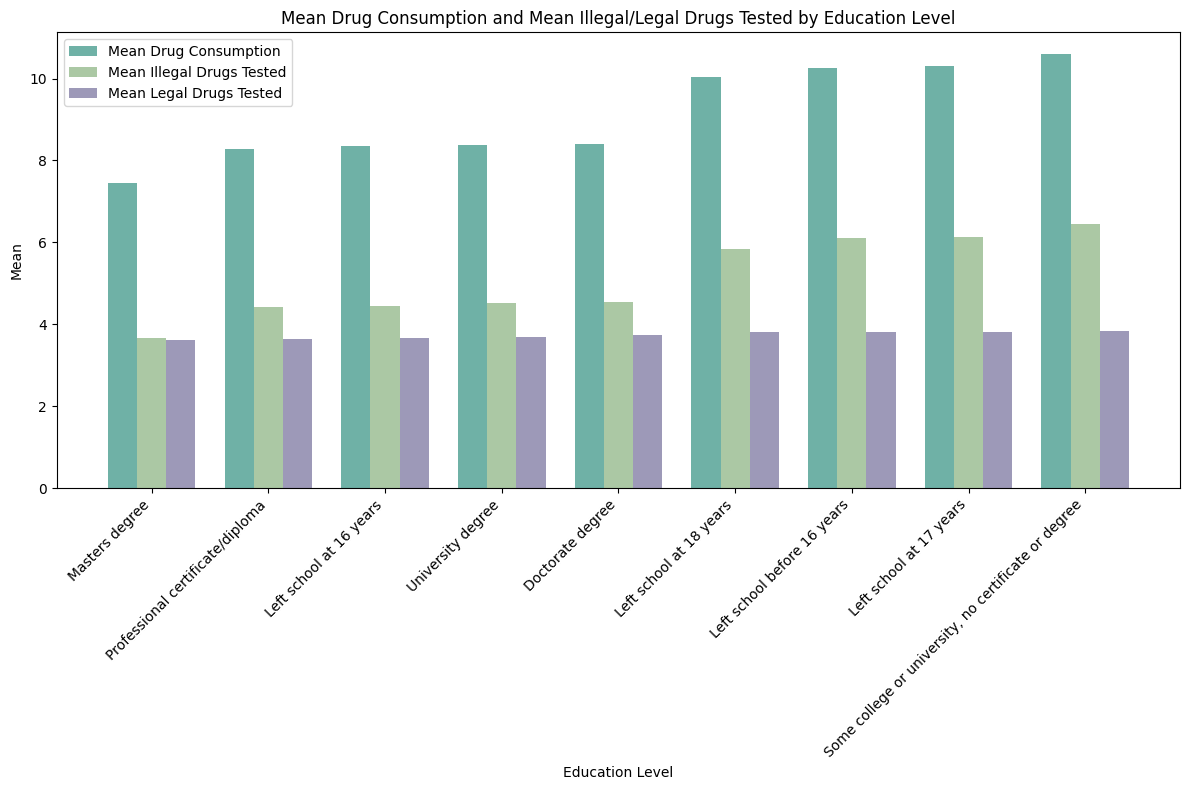

In [65]:
# Group by 'Education' and calculate the mean of drug consumption, illegal drugs tested, and legal drugs tested
education_means = df_vis.groupby('Education')['Drugs Tested'].mean().sort_values(ascending=True)
illegal_education_means = df_vis.groupby('Education')['Illegal Drugs'].mean().sort_values(ascending=True)
legal_education_means = df_vis.groupby('Education')['Legal Drugs'].mean().sort_values(ascending=True)

# Plotting all three on the same plot
plt.figure(figsize=(12, 8))

# Define positions for each category and define the width of each bar
x = np.arange(len(education_means))
width = 0.25

# Plot the mean drugs consumption and the nb of illegal/legal drugs tested
plt.bar(x - width, education_means, width=width, color='#6FB1A6', label='Mean Drug Consumption')
plt.bar(x, illegal_education_means, width=width, color='#ABC8A4', label='Mean Illegal Drugs Tested')
plt.bar(x + width, legal_education_means, width=width, color='#9D99B8', label='Mean Legal Drugs Tested')

# Set the x axis ticks and labels then finally plot the final plot
plt.xticks(x, education_means.index, rotation=45, ha='right')
plt.title('Mean Drug Consumption and Mean Illegal/Legal Drugs Tested by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()

Here we can see several things:

1.   On average, regardless of education level, people have consumed the same number of legal drugs. This is probably due to the fact that legality makes consumption easier.
2.   It follows that the ranking will be between those who have consumed the most illegal drugs.
3.   We can see that the category with the smallest mean drug consumption is Master degree. Whereas the one with biggest mean drug consumption is "Some college or univeristy, no certification or degree". We can therefore try to create 2 categories: 'Graduate' and 'Non-graduate' to try to find correlations.

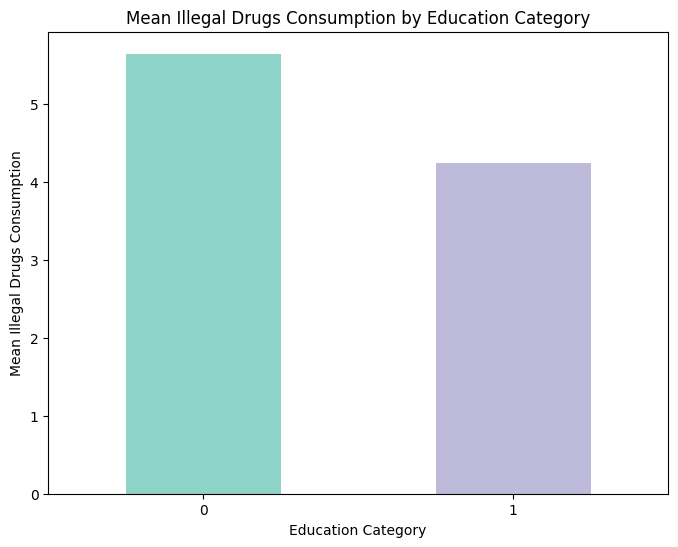

In [66]:
# Define categories for 'Graduate' and 'Non-graduate'
graduate_categories = ['Doctorate degree', 'Masters degree', 'University degree']
non_graduate_categories = [
    'Left school at 16 years',
    'Left school at 17 years',
    'Left school at 18 years',
    'Left school before 16 years',
    'Professional certificate/diploma',
    'Some college or university, no certificate or degree'
]

# Create a new column 'Education Category' based on the defined categories
df_vis['Education Category'] = df_vis['Education'].apply(lambda x: 'Graduate' if x in graduate_categories else 'Non-graduate')
df_vis['Education Category'] = df_vis['Education Category'].map({'Graduate': 1, 'Non-graduate': 0})

# Group by 'Education Category' and calculate the mean of illegal drugs consumption
education_category_means = df_vis.groupby('Education Category')['Illegal Drugs'].mean()

# Plotting the mean number of illegal drugs consumed by 'Graduate' and 'Non-graduate'
plt.figure(figsize=(8, 6))
education_category_means.plot(kind='bar', color=colors)
plt.title('Mean Illegal Drugs Consumption by Education Category')
plt.xlabel('Education Category')
plt.ylabel('Mean Illegal Drugs Consumption')
plt.xticks(rotation=0)
plt.show()

In [67]:
education_category_means

Education Category
0    5.649564
1    4.248826
Name: Illegal Drugs, dtype: float64

We can see that, on average, graduate people test 1.4 drugs less than non-graduate people.

/tmp/ipykernel_44645/1620977860.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_columns.corr()


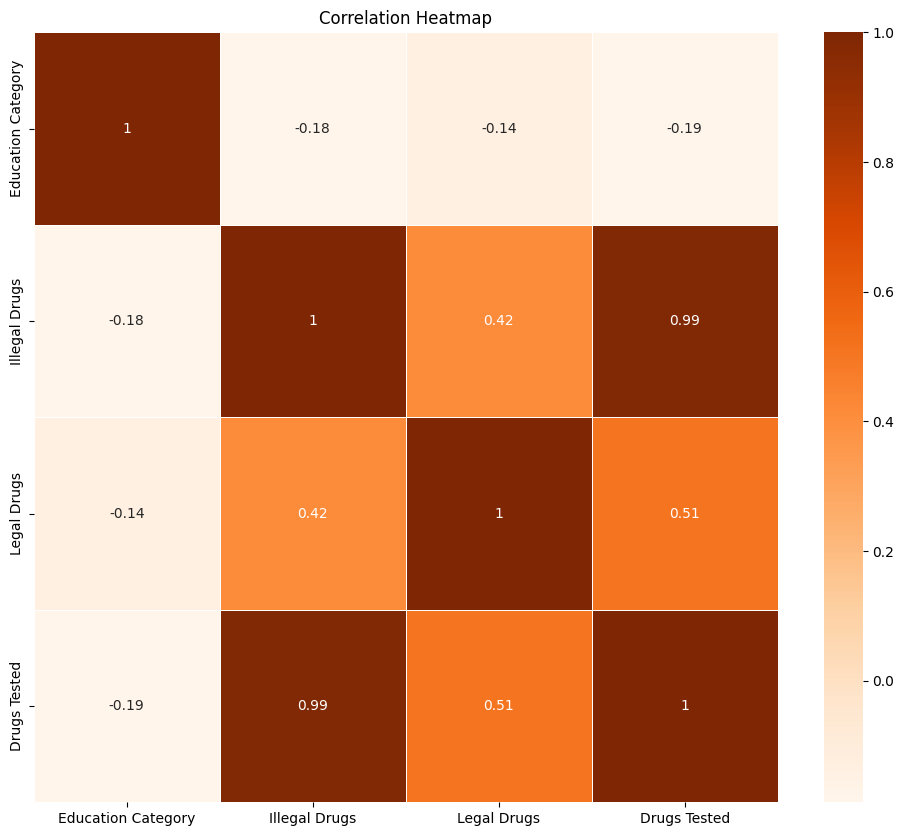

In [68]:
correlation_columns = df_vis[['Education', 'Education Category', 'Illegal Drugs','Legal Drugs', 'Drugs Tested']]

# Calculate the matrix
correlation_matrix = correlation_columns.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

Thanks to this correlation matrix, we can see many things:
1. The 'obvious' correlations such as education category and education and the nb of illegal drugs tested and the nb of drugs tested.
2. However, the nb of **legal** drugs tested is not as correlated with the nb of drugs tested as it is with **illegal** drugs. This is always due to the fact that everyone has already tested legal drugs, and that the number of drugs tested is due to the number of illegal drugs tested.
3. We can see that there is no correlation between Education and the number of drugs tested.

Conclusions: Legal drugs have been trivialized. Graduates test less than non-graduates.

#### Big Five Personality and Drug consumption

There are 5 personality traits, a widely recognized model in psychology that describes human personality using five broad dimensions:
1. Openness to Experience (Oscore): Reflects a person's imagination, creativity, willingness to try new things, and appreciation for art and adventure.

2. Conscientiousness (Nscore): Refers to how organized, responsible, dependable, and goal-oriented an individual is.

3. Extraversion (Escore): Represents the degree of sociability, assertiveness, talkativeness, and comfort in social settings.

4. Agreeableness (Ascore): Relates to how cooperative, compassionate, empathetic, and considerate a person is in social interactions.

5. Neuroticism (Cscore): Reflects emotional stability or instability, including tendencies toward anxiety, moodiness, irritability, and stress susceptibility.

There is also other personality traits:
6. Impulsiveness (Impulsive Rate): Reflects a tendency to act on immediate desires without considering consequences.

7. Sensation Seeking (SS): Measures the desire for varied, novel, and intense experiences. Higher scores suggest a preference for excitement, risk-taking, and novelty-seeking behaviors.

1. **Sensation Seeking and Personality Traits:**

High sensation seekers (SS) tend to be more open-minded (Oscore) and might explore various experiences.
Individuals open to experience might show a greater inclination to test a variety of drugs (Narcotics), signifying a relationship between their exploratory nature and drug testing behavior.

2. **Impulsiveness and Sensation Seeking:**

The strong correlation between sensation seeking and impulsiveness indicates that those seeking sensations may act impulsively in pursuing new experiences, potentially leading to drug testing.
Individuals with higher sensation seeking tendencies might impulsively explore diverse substances, aligning with their thrill-seeking nature.

3. **Personality Traits - Extraversion and Conscientiousness:**

An inverse relationship exists between extraversion (Escore) and neuroticism (Nscore), suggesting that more outgoing individuals (high E) might experience fewer negative emotions (low N).
Similarly, the negative correlation between conscientiousness (Cscore) and neuroticism (Nscore) implies that responsible and organized individuals (high C) might experience fewer mood swings or negative emotions.

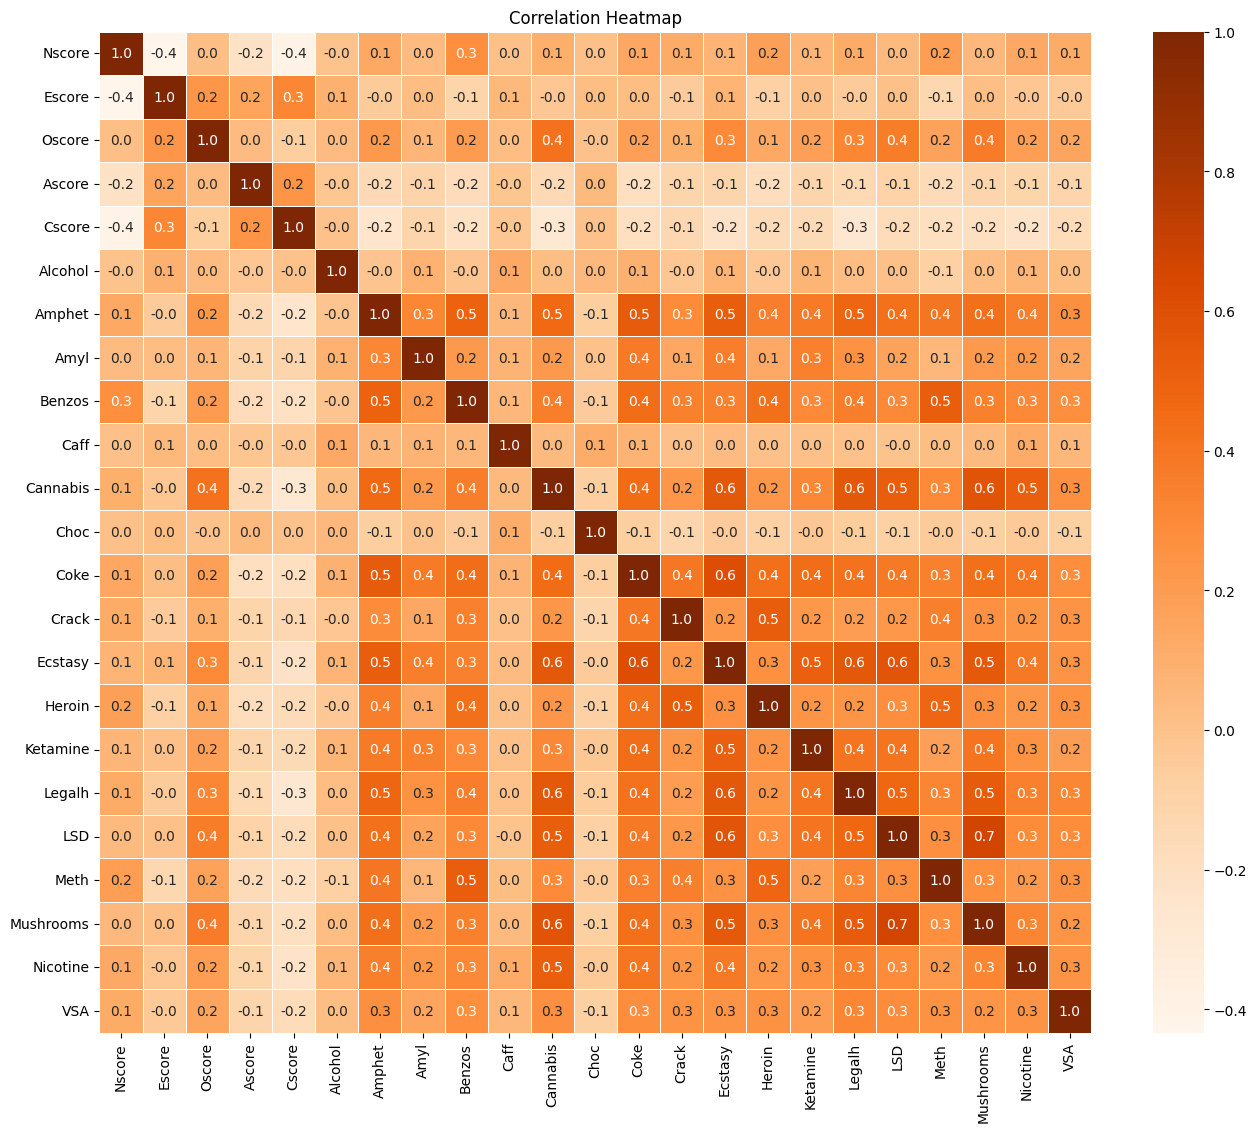

In [69]:
bigv = ['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore']
drugs = [
    'Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
    'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
    'Nicotine', 'VSA'
]

subset_df = df_vis[bigv+drugs].astype(float).corr()
#subset_df = pd.pivot_table(subset_df, index=bigv, values=drugs)

# Calculate the correlation matrix
#correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(16, 13))
sns.heatmap(subset_df, annot=True, cmap='Oranges', linewidths=.5, fmt=".1f")

plt.title('Correlation Heatmap')
plt.show()

/tmp/ipykernel_44645/2282908086.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


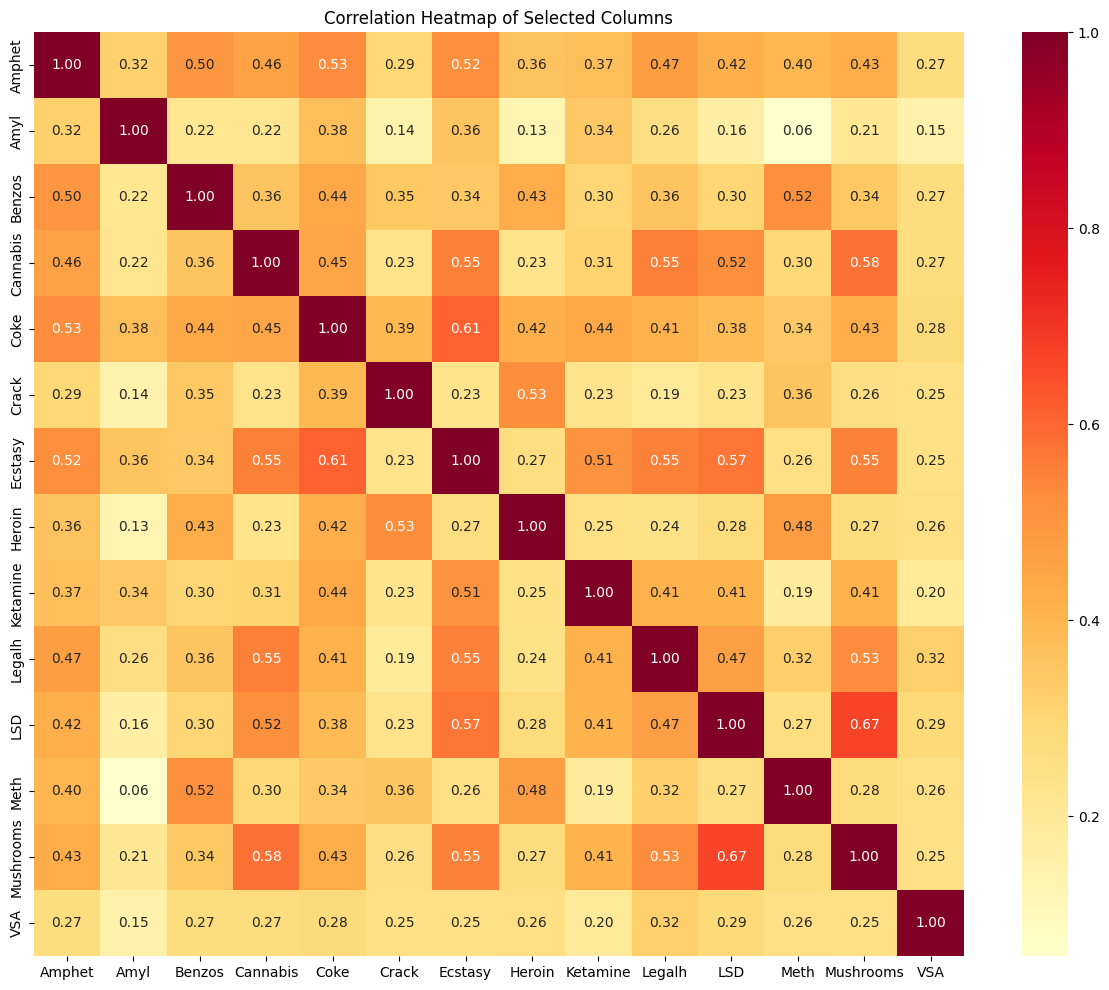

In [70]:
columns_of_interest = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke',
                       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
                       'VSA', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Create a subset DataFrame with selected columns
subset_df = df_vis[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

We can clearly see that Oscore, Impulsiveness and Sensation Seekness are more correlated with the illegal drugs consumption than Nscore,Escore, Ascore and Cscore.

Personnality:
1. Cannabis and SS/Oscore: Cannabis use often appeals to individuals seeking altered sensory experiences or relaxation. Those with higher SS scores might be more inclined towards the sensory effects or experiences related to cannabis use.

2. Legal Highs (Legalh) and SS/Oscore: Legal highs might offer unconventional or legal alternatives to illicit drugs, attracting individuals with higher sensation-seeking traits who seek novel experiences but within legal boundaries.

3. Ecstasy (Extasy) and SS/Oscore: Ecstasy, known for its euphoric effects and sensory enhancement, is commonly linked to social settings and heightened sensations. Individuals with higher SS scores might be drawn to its effects on sensory experiences and sociability.

4. Mushrooms and SS/Oscore: Psychedelic mushrooms can induce hallucinations and altered perceptions. Those with higher SS scores might be intrigued by the intense sensory and perceptual changes associated with their use.

Drugs:
1. Correlation of Highly Addictive Drugs: Crack and heroin exhibit a notable correlation between each other and certain other substances like cannabis and meth. These substances possess high addiction potential, leading to focused consumption once tried due to intense cravings and dependence.

2. Influence of Addiction Potential: Substances with high addictive qualities, such as crack and heroin, may prompt individuals to prioritize and focus primarily on these drugs after initial use. This focused consumption pattern might lead to weaker correlations with other substances as users may be less inclined to explore or use different drugs.

#### Consumer vs Non-Consumer/Tester

In [71]:
# For the Alcoholo column
df_vis['Consumer_Type'] = df_vis['Alcohol'].apply(lambda x: 2 if x == 4.0 or x == 5.0 or x == 6.0 else (1 if x == 3.0 or x == 2.0 or x == 1.0 else 0))
df_vis['Consumer_Type']

ID
1       2
2       2
3       2
4       2
5       2
       ..
1884    2
1885    2
1886    2
1887    2
1888    2
Name: Consumer_Type, Length: 1885, dtype: int64

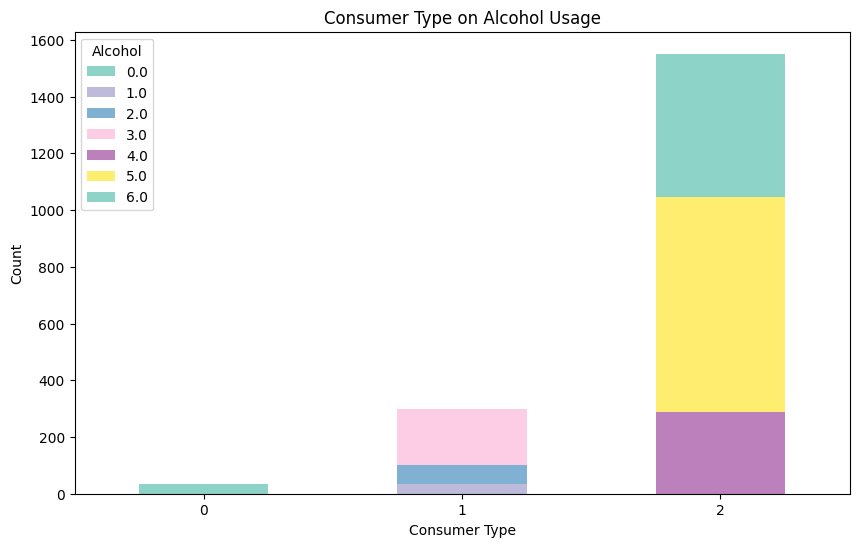

In [72]:
# Grouping by 'Consumer_Type' and 'Alcohol' columns and counting occurrences
grouped = df_vis.groupby(['Consumer_Type', 'Alcohol']).size().unstack()

# Plotting the bar plot with specific colors
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Consumer Type on Alcohol Usage')
plt.xlabel('Consumer Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Alcohol')
plt.show()

Many people drinks "often".

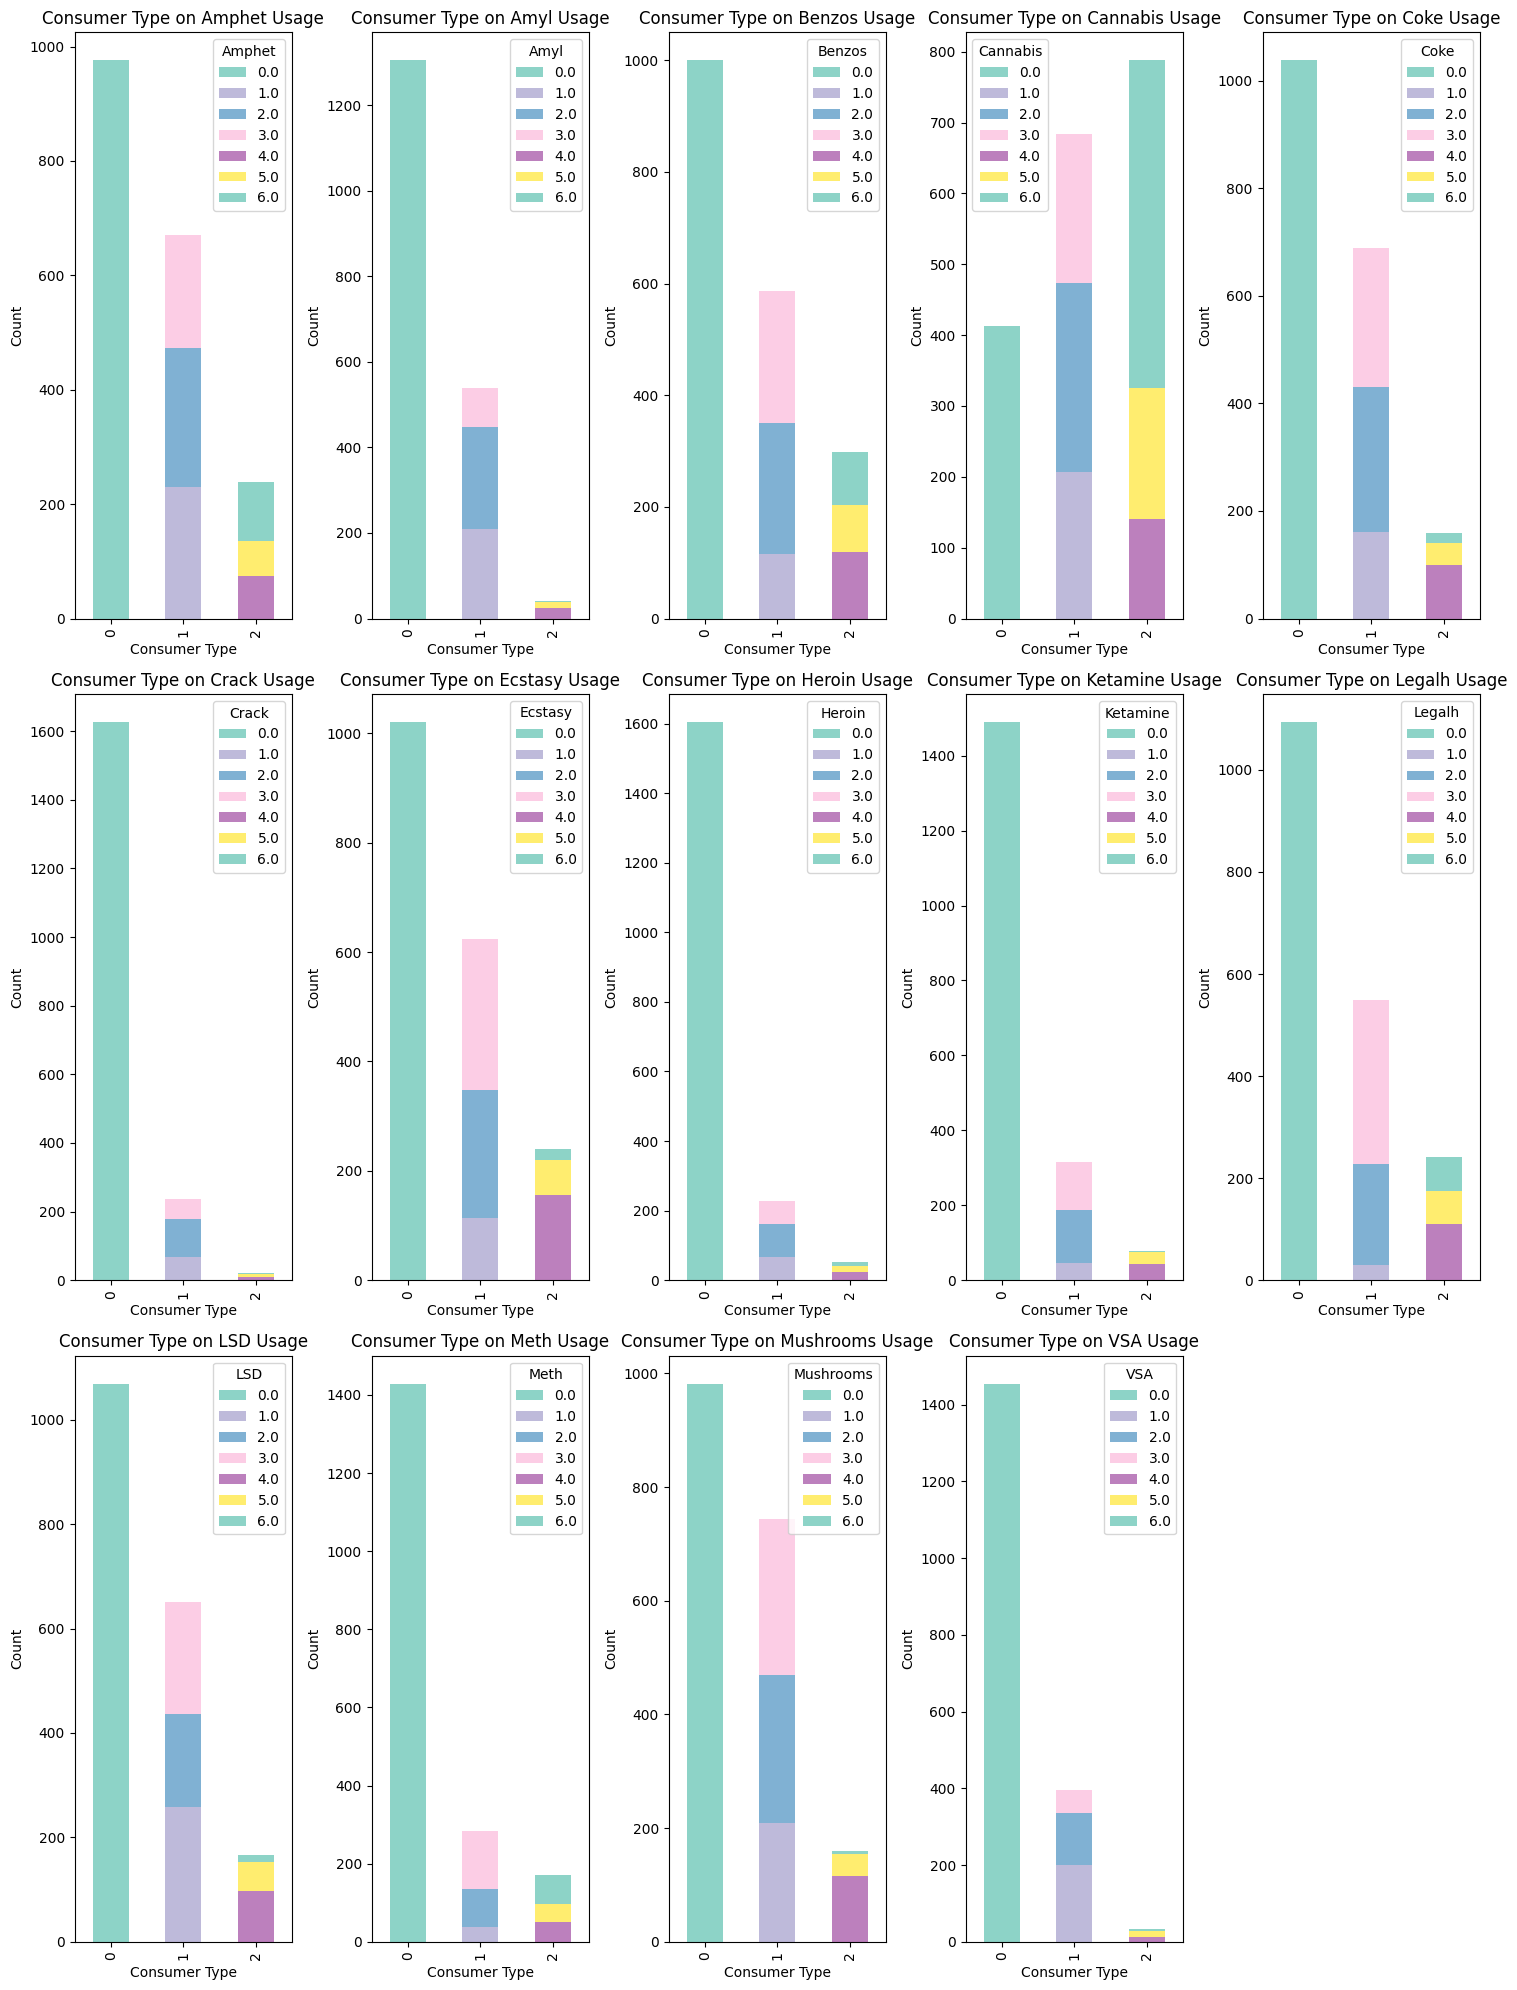

In [73]:
drug_columns = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'VSA']

# Just to make a beautiful plot:
# Calculate the number of rows and columns for subplots
n_rows = 3  # Number of rows
n_cols = len(drug_columns) // n_rows + (len(drug_columns) % n_rows > 0)  # Number of columns

# Create subplots for each drug in a grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

# Plot Consumer Types for each drug
for i, drug in enumerate(drug_columns):
    row = i // n_cols
    col = i % n_cols
    df_vis[f'{drug}_Consumer_Type'] = df_vis[drug].apply(lambda x: 2 if x == 4.0 or x == 5.0 or x == 6.0 else (1 if x == 3.0 or x == 2.0 or x == 1.0 else 0))
    grouped = df_vis.groupby([f'{drug}_Consumer_Type', drug]).size().unstack()
    grouped.plot(kind='bar', stacked=True, ax=axes[row, col], color=colors)
    axes[row, col].set_title(f'Consumer Type on {drug} Usage')
    axes[row, col].set_xlabel('Consumer Type')
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title=drug)

# Hide empty subplots
for i in range(len(drug_columns), n_rows * n_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


We found on different sources talking about the drugs that are the hardest to find and to quit/most dangerous.

Firstly here is an approximative list in order to the lass accessible drug to the to the most.

(Sources : The organisation of American addiction center, Oxford Treatment center, National Institute of drug abuse)


* Heroin: A highly addictive and illicit drug, often associated with high prices on the black market.

* Cocaine (Coke): A stimulant derived from the coca plant, known for its stimulating effects and relatively expensive price.

* Ketamine: A dissociative anesthetic that can induce hallucinogenic effects, considered relatively costly.

* LSD: A potent hallucinogenic drug often sold as small squares of paper ("tabs"), generally less expensive than heroin or cocaine.

* Methamphetamine (Meth): A highly addictive stimulant, relatively cheaper compared to heroin or cocaine.

* Ecstasy: A synthetic drug with both stimulant and hallucinogenic effects, generally less expensive than some other drugs mentioned.

* Cannabis: A psychoactive drug whose price can vary depending on factors such as quality, legality, and location.

* Benzos: Prescription drugs used to treat anxiety and insomnia, generally less expensive compared to illicit drugs.

* Mushrooms: Psychedelic mushrooms containing psilocybin, generally considered not too expensive.

* Legalh: Those drugs are the legalized highs. They depends on the legislation of the country.

* Amphetamines (Amphet): Stimulant drugs sometimes prescribed for medical purposes, generally less expensive compared to illicit drugs.

* Amyl (Poppers): Volatile liquids used recreationally, typically considered less expensive compared to many other drugs and easy to find.

* VSA (Versatile Substance Abuse): Not a specific substance or drug, this is a class of solvant drugs such as glue. It is easy to find.



We can see a direct link between the accessibility of the drugs and the consumers usage of the drugs.

## Machine Learning

For this section we will try to predict the number of drugs someone would have taken in his/her life according to his/her personnality scores.

### Encoding the dataframe

First we ordinally encode the data about drugs and last moment of consumption

In [74]:
df_ml = df.copy()

In [75]:
df_ml

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Drugs Tested,TMTO,Legal Drugs,Illegal Drugs
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0.0,0.0,0.0,0.0,2.0,0.0,6,1,4,2
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0.0,2.0,3.0,0.0,4.0,0.0,12,1,4,8
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0.0,0.0,0.0,1.0,0.0,0.0,5,1,3,2
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0.0,0.0,0.0,0.0,2.0,0.0,8,1,4,4
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1.0,0.0,0.0,2.0,2.0,0.0,10,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,3.0,3.0,0.0,0.0,0.0,5.0,7,1,3,3
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,3.0,5.0,4.0,4.0,5.0,0.0,10,1,4,6
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,0.0,2.0,0.0,2.0,6.0,0.0,13,1,4,9


We binarize binary features (gender in our case)

In [76]:
df_ml['Gender'].value_counts()

-0.48246    943
 0.48246    942
Name: Gender, dtype: int64

We also need to ordinally encode columns education and age

In [77]:
df_ml['Age'].value_counts()

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64

In [78]:
age_categories = df_ml['Age'].value_counts().index.sort_values()
age_categories

Float64Index([-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171], dtype='float64')

In [79]:
ord_enc = OrdinalEncoder(categories=[age_categories])

In [80]:
df_ml['Age'] = ord_enc.fit_transform(df_ml['Age'].to_numpy().reshape(-1,1))
df_ml['Age']

ID
1       2.0
2       1.0
3       2.0
4       0.0
5       2.0
       ... 
1884    0.0
1885    0.0
1886    1.0
1887    0.0
1888    0.0
Name: Age, Length: 1885, dtype: float64

In [81]:
edu_categories = df_ml['Education'].value_counts().index.sort_values()
edu_categories

Float64Index([-2.43591,  -1.7379, -1.43719, -1.22751, -0.61113, -0.05921,
               0.45468,  1.16365,  1.98437],
             dtype='float64')

In [82]:
ord_enc = OrdinalEncoder(categories=[edu_categories])

In [83]:
df_ml['Education'] = ord_enc.fit_transform(df_ml['Education'].to_numpy().reshape(-1,1))
df_ml['Education']

ID
1       5.0
2       8.0
3       5.0
4       7.0
5       8.0
       ... 
1884    4.0
1885    4.0
1886    6.0
1887    4.0
1888    4.0
Name: Education, Length: 1885, dtype: float64

We drop the columns of ethnicity and country of origin. Besides being racist, making predictions based on people's ethnic/nation origin lacks relevance.

In [84]:
#Decide what to do with ethnicity and country
df_ml.drop(['Ethnicity','Country'], axis=1, inplace=True)

We scale our data, using standard scaler. Scaling the data is an important step in machine learning because it helps to ensure that features are on a similar scale and have a comparable range of values.

In [85]:
scaler = StandardScaler()
scaler.fit(df_ml)

StandardScaler()

In [86]:
binarizer = Binarizer(threshold=0.0)
df_ml['Gender'] = binarizer.fit_transform([df['Gender']]).reshape(-1,1)
df_ml['Gender'].value_counts()

0.0    943
1.0    942
Name: Gender, dtype: int64

We can check how much of these people has never tested any drug.

In [87]:
df_ml['TMTO'].value_counts()

1    1884
0       1
Name: TMTO, dtype: int64

In [88]:
df_ml[df_ml['TMTO'] == 0]

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,...,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Drugs Tested,TMTO,Legal Drugs,Illegal Drugs
ID,,,,,,,,,,,,,,,,,,,,,
1281,0.0,0.0,6.0,0.82562,0.63779,-0.84732,-2.21844,0.93949,1.86203,1.92173,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


We now know that each of these individuals has tested at least one drug (which is not surprising considering chocolate is a column in this df). Because the TMTO has little variance we can drop it.

In [89]:
df_ml.drop('TMTO', inplace=True, axis=1)

For this part we make sure to work whith floats.

In [90]:
df_ml = df_ml.astype('float64')
df_ml.dtypes

Age              float64
Gender           float64
Education        float64
Nscore           float64
Escore           float64
Oscore           float64
Ascore           float64
Cscore           float64
Impulsive        float64
SS               float64
Alcohol          float64
Amphet           float64
Amyl             float64
Benzos           float64
Caff             float64
Cannabis         float64
Choc             float64
Coke             float64
Crack            float64
Ecstasy          float64
Heroin           float64
Ketamine         float64
Legalh           float64
LSD              float64
Meth             float64
Mushrooms        float64
Nicotine         float64
VSA              float64
Drugs Tested     float64
Legal Drugs      float64
Illegal Drugs    float64
dtype: object

Making a df without the drugs

In [91]:
df_ml_without_drugs = df_ml.drop(drug_names, axis=1)
df_ml_without_drugs

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Drugs Tested,Legal Drugs,Illegal Drugs
ID,,,,,,,,,,,,,
1,2.0,1.0,5.0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,6.0,4.0,2.0
2,1.0,0.0,8.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,12.0,4.0,8.0
3,2.0,0.0,5.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,5.0,3.0,2.0
4,0.0,1.0,7.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,8.0,4.0,4.0
5,2.0,1.0,8.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,10.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0.0,1.0,4.0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,7.0,3.0,3.0
1885,0.0,0.0,4.0,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,10.0,4.0,6.0
1886,1.0,1.0,6.0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,13.0,4.0,9.0


In [92]:
df_ml_without_drugs.to_csv('kNN.csv')

### Making the test and train sets

In [93]:
df_ml_without_drugs

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Drugs Tested,Legal Drugs,Illegal Drugs
ID,,,,,,,,,,,,,
1,2.0,1.0,5.0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,6.0,4.0,2.0
2,1.0,0.0,8.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,12.0,4.0,8.0
3,2.0,0.0,5.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,5.0,3.0,2.0
4,0.0,1.0,7.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,8.0,4.0,4.0
5,2.0,1.0,8.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,10.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0.0,1.0,4.0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,7.0,3.0,3.0
1885,0.0,0.0,4.0,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,10.0,4.0,6.0
1886,1.0,1.0,6.0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,13.0,4.0,9.0


In [94]:
x = df_ml_without_drugs.drop(['Drugs Tested','Legal Drugs','Illegal Drugs'], axis=1)
y = df_ml_without_drugs['Illegal Drugs']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

### kNN predicting number

We are going to use the Knn algotithm for our model. The K-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm that classifies a new data point based on the majority class of its K nearest neighbors in the feature space.

In [96]:
model = KNeighborsRegressor(n_neighbors=5)

In [97]:
model.fit(x_train, y_train)

KNeighborsRegressor()

In [98]:
pred = model.predict(x_test)

In [99]:
mean_squared_error(pred, y_test)

11.69406779661017

We try to select the best value for k

In [100]:
params = {'weights':['uniform','distance'],'n_neighbors':[1,3,5,10,25,50,100,150]}

WARNING : The sklearn_evaluation package has a compatibility bug that makes it read deprecated keys of the cv_results_ dict. To solve it you need to go into the source code of the package at the specified file in the error and change the 
- ```cv_results_["std_test_score"] and cv_results_["mean_test_score"]```  
to  
- ```cv_results_["std_test_r2"] and cv_results_["mean_test_r2"]```

In [101]:
from sklearn_evaluation import plot as plt_eval

def grid_search_report(model, params, change, figsize=(10,10), scoring=None):
    if not scoring:
        scoring = ['r2']
        
    grid_search = GridSearchCV(model, params, scoring=scoring, refit=scoring[0], n_jobs=-1, return_train_score=True)
    grid_search.fit(x_train,y_train)
    print(grid_search.best_params_)
    
    fig, ax = plt.subplots(figsize=figsize)
    plt_eval.grid_search(grid_search.cv_results_, change=change,ax=ax)
    plt.show()

{'n_neighbors': 50, 'weights': 'distance'}


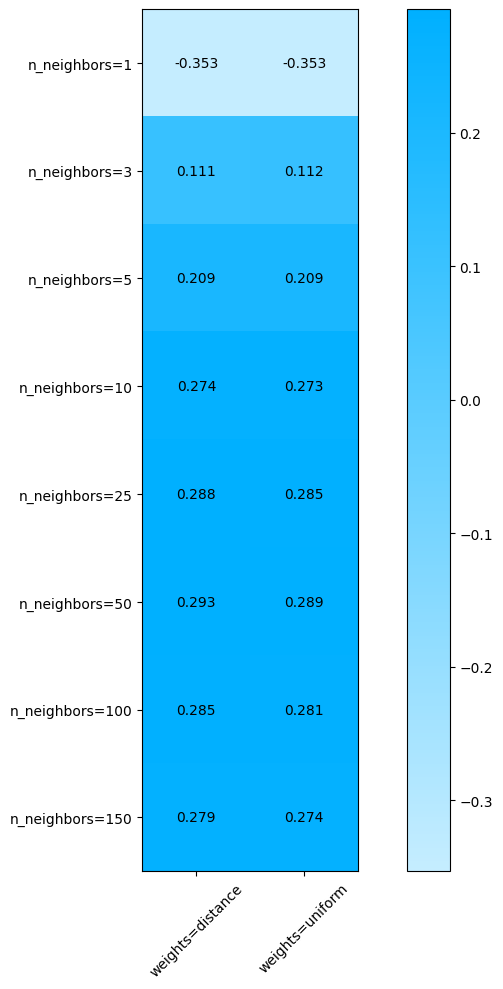

In [102]:
grid_search_report(model, params, params.keys())

In [129]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

11.725169413343941

### Gaussian naive Bayes

We can suppose the personnality of people follow a gaussian distribution, like IQ or height. Let's try to build better models with gaussian naive Bayes models.

In [103]:
model = GaussianNB()

In [104]:
model.fit(x_train, y_train)

GaussianNB()

In [105]:
pred = model.predict(x_test)

In [106]:
mean_squared_error(y_test, pred)

18.61228813559322

Poor performance of the gaussian naive Bayes model, compared to kNN

### Random forests

In [107]:
model = RandomForestRegressor(random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

10.090613347457628

Now we'll search for the best value of the estimators of the ensemble of the decision trees in the random forest. This can take a few minutes.

Because of the random nature of the random forest regressor the model's error never really stabilizes but on average it stops decreasing at around 60, which is near the optimal value

The random forest model seems to have nearly the same performance as the kNN one. What we could do the improve that difference and discard one of the two is through cross validation. But that also adds time to model selection phase. The main advantage of kNN is that it doesn't need training, in comparison to the random forest.

In [108]:
params = {"criterion":["squared_error","absolute_error","friedman_mse","poisson"], "n_estimators":[50,100,150]}

{'criterion': 'absolute_error', 'n_estimators': 150}


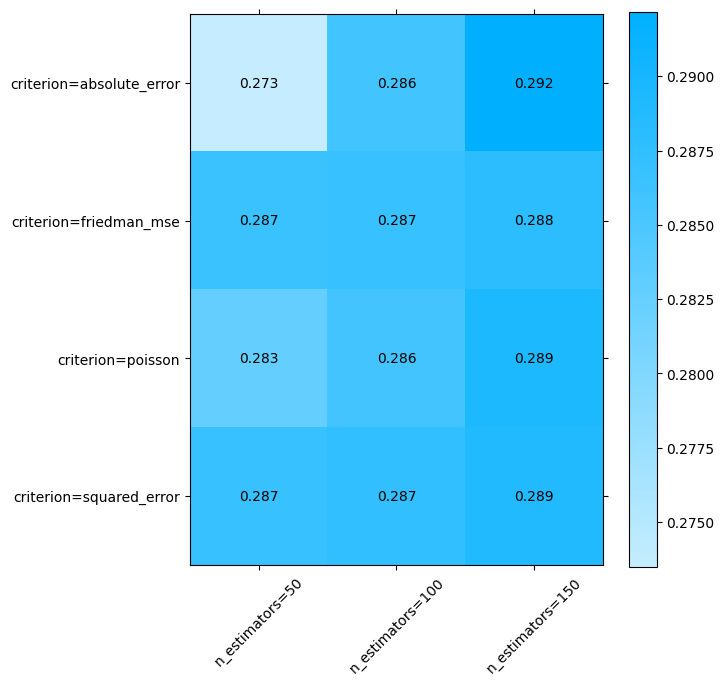

In [109]:
grid_search_report(model, params, change=('criterion','n_estimators'), figsize=(7,7))

Seems like the best model is the one with 100 estimators (100 random forests) with the absolute error as a criterion

In [110]:
model = RandomForestRegressor(criterion='absolute_error', n_estimators=150, random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

10.283036723163844

The random forest model has less MSE than kNN, but takes more time to train.

## Deep learning (bonus)

Using the keras library from tensorflow we can build a deep learning model. For this kind of regression with (supposedly) unrelated data, we can simply use dense layers. If we had an image we would have used a convolutionnal layers and if we had time-related data we would have used a recurrent layers or LSTMs.

This is to disable tensorflow for using the GPU. If you are launching that notebook from your PATH you can comment out that cell.

In [161]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [162]:
from keras import Sequential, Model
from keras.layers import Dense, Input

In [163]:
def create_dense_model(n_hidden_layers, n_inputs):
  model = Sequential()
  model.add(Input(n_inputs))
  for _ in range(0,n_hidden_layers):
    model.add(Dense(n_inputs, activation='relu'))

  model.add(Dense(1, activation='relu'))
  return model

In [164]:
n_inputs = len(x.columns)

model = create_dense_model(3, n_inputs)

In [165]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [166]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
45/45 [==============================] - 1s 914us/step - loss: 40.6581 - mean_absolute_error: 5.0557
Epoch 2/10
45/45 [==============================] - 0s 1ms/step - loss: 38.5030 - mean_absolute_error: 4.9037
Epoch 3/10
45/45 [==============================] - 0s 990us/step - loss: 28.8050 - mean_absolute_error: 4.2374
Epoch 4/10
45/45 [==============================] - 0s 968us/step - loss: 17.3844 - mean_absolute_error: 3.5307
Epoch 5/10
45/45 [==============================] - 0s 964us/step - loss: 14.5074 - mean_absolute_error: 3.2530
Epoch 6/10
45/45 [==============================] - 0s 996us/step - loss: 13.4235 - mean_absolute_error: 3.0826
Epoch 7/10
45/45 [==============================] - 0s 997us/step - loss: 12.8382 - mean_absolute_error: 2.9841
Epoch 8/10
45/45 [==============================] - 0s 1ms/step - loss: 12.4341 - mean_absolute_error: 2.9130
Epoch 9/10
45/45 [==============================] - 0s 994us/step - loss: 12.1161 - mean_absolute_error: 2.8

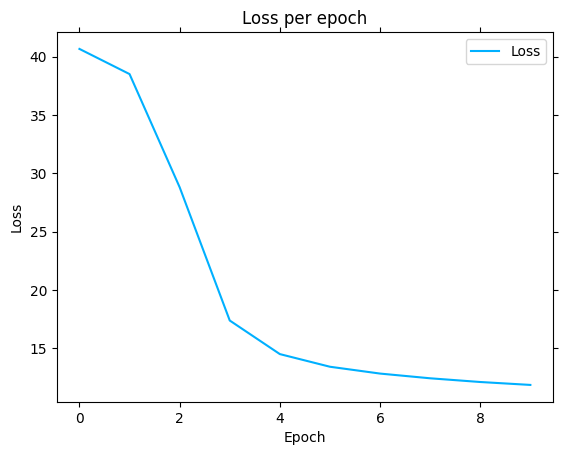

In [167]:
loss_hist = history.history['loss']
mae_hist = history.history['mean_absolute_error']
plt.plot(history.epoch, loss_hist, label='Loss')
#plt.plot(history.epoch, mae_hist, label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch')
plt.legend()
plt.show()

In [168]:
pred = model.predict(x_test)

15/15 [==============================] - 0s 860us/step


In [169]:
(mean_absolute_error(pred, y_test), mean_squared_error(pred, y_test))

(2.878561076723923, 12.231545665403281)

We obtained a model with around the same performance as the previous machine learning models. We could improve this model and add more layers, but that would increase training time.

In [170]:
model = create_dense_model(12, n_inputs)

In [171]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [172]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
45/45 [==============================] - 1s 1ms/step - loss: 33.7182 - mean_absolute_error: 4.5501
Epoch 2/50
45/45 [==============================] - 0s 1ms/step - loss: 13.9065 - mean_absolute_error: 3.1200
Epoch 3/50
45/45 [==============================] - 0s 1ms/step - loss: 12.5160 - mean_absolute_error: 2.9685
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 12.1780 - mean_absolute_error: 2.9163
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 11.7814 - mean_absolute_error: 2.8530
Epoch 6/50
45/45 [==============================] - 0s 1ms/step - loss: 11.5110 - mean_absolute_error: 2.8180
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 11.2498 - mean_absolute_error: 2.7840
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 11.1069 - mean_absolute_error: 2.7565
Epoch 9/50
45/45 [==============================] - 0s 1ms/step - loss: 10.8989 - mean_absolute_error: 2.7277
Epoch 10/5

Because the dataset we have is not that big, the training takes little time. We have improved the metric of our model, but the model could be overfitting for too many epochs

In [173]:
pred = model.predict(x_test)
(mean_absolute_error(pred, y_test), mean_squared_error(pred, y_test))

15/15 [==============================] - 0s 976us/step


(2.594036429867906, 10.254967851634392)

The model we have now is not overfitting. It is now comparable to the Random Forest one. Let's see what could happen if we set the epoch to, say, 200.

In [174]:
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
45/45 [==============================] - 0s 1ms/step - loss: 9.0661 - mean_absolute_error: 2.4227
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 9.0210 - mean_absolute_error: 2.4121
Epoch 3/200
45/45 [==============================] - 0s 1ms/step - loss: 8.9879 - mean_absolute_error: 2.3979
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 8.9265 - mean_absolute_error: 2.3970
Epoch 5/200
45/45 [==============================] - 0s 1ms/step - loss: 8.8850 - mean_absolute_error: 2.3713
Epoch 6/200
45/45 [==============================] - 0s 1ms/step - loss: 8.9914 - mean_absolute_error: 2.4094
Epoch 7/200
45/45 [==============================] - 0s 1ms/step - loss: 9.0128 - mean_absolute_error: 2.4015
Epoch 8/200
45/45 [==============================] - 0s 1ms/step - loss: 8.9624 - mean_absolute_error: 2.4174
Epoch 9/200
45/45 [==============================] - 0s 1ms/step - loss: 8.8993 - mean_absolute_error: 2.3941
Epoch 10/2

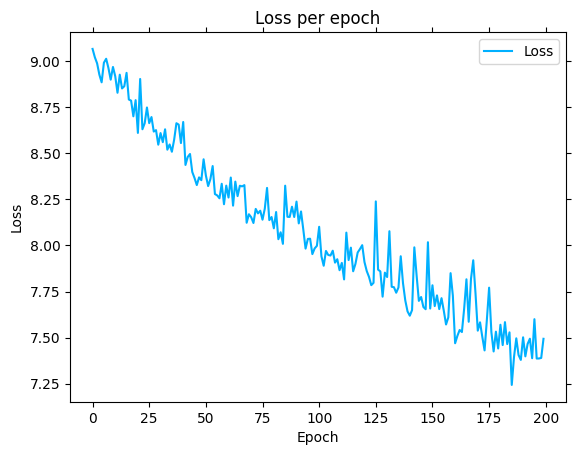

In [175]:
loss_hist = history.history['loss']
mae_hist = history.history['mean_absolute_error']
plt.plot(history.epoch, loss_hist, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch')
plt.legend()
plt.show()

In [158]:
# rerun this cell multiple times if necessary

history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
45/45 [==============================] - 0s 2ms/step - loss: 7.4781 - mean_absolute_error: 2.1326
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 7.8391 - mean_absolute_error: 2.1977
Epoch 3/200
45/45 [==============================] - 0s 1ms/step - loss: 7.5147 - mean_absolute_error: 2.1200
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 7.7171 - mean_absolute_error: 2.1666
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 7.4223 - mean_absolute_error: 2.1399
Epoch 6/200
45/45 [==============================] - 0s 2ms/step - loss: 7.5771 - mean_absolute_error: 2.1473
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 7.3640 - mean_absolute_error: 2.1124
Epoch 8/200
45/45 [==============================] - 0s 1ms/step - loss: 7.3397 - mean_absolute_error: 2.1107
Epoch 9/200
45/45 [==============================] - 0s 1ms/step - loss: 7.4328 - mean_absolute_error: 2.1229
Epoch 10/2

In [177]:
pred = model.predict(x_test)
(mean_absolute_error(pred, y_test), mean_squared_error(pred, y_test))

15/15 [==============================] - 0s 778us/step


(2.7460096354706813, 11.760190840568812)

Now we see that the mean absolute error is increasing, this is due to the fact that the model is overfitting to the dataset. It cannot properly predict values from features values outside this dataset.  
Solution to this problem at that point is to either increase the number of features per sample, or increase the number of samples in the dataset.

The limits of this model is that first it is not cross validated. Second, it is ²really energy inefficient, we had to wait some time and build the whole model. It's also memory intensive, and uses power. All that to obtain a performance that is in 5% of the kNN model performance. So while the neural network is more precise, it can also be less convenient.

For our dataset, there is no point in training a whole network to have the same performance as a kNN, that is less greedy in training, time and energy. So for now we will use the kNN as the model for the API.